In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

valid_metrics = ['rmseloss', 'maeloss', 'quantile score\n(q=0.3)', 'accuracy rate']
ffnn_params=set()
rnn_params=set()
cnn_params=set()
all_results = []

os.chdir('training results')

for file in os.listdir():
    if 'power_curve' in file:
        os.rename(file, file.replace('power_curve','powercurve'))


for file in os.listdir():
    if file[-4:] != '.npz':# or 'drop_cols' in file:
        continue
    f = np.load(file)
    # Mean over k folds, extract value from last epoch
    t = f['train_loss'].mean(axis=-1)
    v = f['valid_loss'].mean(axis=-1)
    v[0] = np.sqrt(v[0])
    
    params = file.split('--')
    nn_dict = {'type': params.pop(0)[:-1], 'train':t, **dict(zip(valid_metrics,v))}
    params[-1] = params[-1][:-4]
    for i in range(len(params)-1):
        params[i] = params[i][:-1]
    for i in range(len(params)):
        sep = params[i].rfind('_')
        par = params[i][sep+1:]
        try:
            nn_dict[params[i][:sep]] = float(par)
        except ValueError:
            nn_dict[params[i][:sep]] = par
        
    if nn_dict['type']=='ffnn':
        ffnn_params.update([key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics])
    elif nn_dict['type']=='cnn':
        cnn_params.update([key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics])
    elif nn_dict['type']=='rnn':
        rnn_params.update([key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics])
    
    all_results.append(nn_dict)
    
    
    

In [7]:
def plot_parameter(par_plot, subset, do_plot=True):
    par_plot_values=[]
    nns_to_check=[]
    for nn in all_results:
        if subset.items() <= nn.items():
            nns_to_check.append(nn)
            par_plot_values.append(nn[par_plot])



    default_value = max(par_plot_values, key=par_plot_values.count)

    for nn in nns_to_check:
        if nn[par_plot] != default_value:
            all_default_values = {key: nn[key] for key in nn.keys() if key not in [par_plot, 'train']+valid_metrics}
            break
    
    if do_plot:
        fig, ax = plt.subplots(nrows=len(valid_metrics),ncols=2, figsize=(10,10), dpi=100, sharex='col',sharey='row')
        for i, metric in enumerate(valid_metrics):
            for nn in nns_to_check:
                if all_default_values.items() <= nn.items():
                    ax[i,0].plot(nn[par_plot],nn[metric][-1],'.',markersize=10)
                    ax[i,1].plot(nn[metric],'.',markersize=10)


            ax[i,0].set(ylabel=metric)
            if i == len(valid_metrics)-1:
                
                if 'cols' in par_plot:
                    for tick in ax[i,0].get_xticklabels():
                        tick.set_rotation(25)
                    ax[i,0].set(xlabel='dropped feature')
                else:
                    ax[i,0].set(xlabel=par_plot)
                    
                ax[i,1].set(xlabel='epoch')
            
        if 'cols' in par_plot:
            fig.suptitle('dropped feature')
        else:
            fig.suptitle(par_plot)
        fig.tight_layout()
        plt.savefig(f'plots/sensitivity_{subset["type"]}_{par_plot}_case_{subset["case"]}.pdf')
        plt.show()
    
    
    return nns_to_check
    
    
    
    

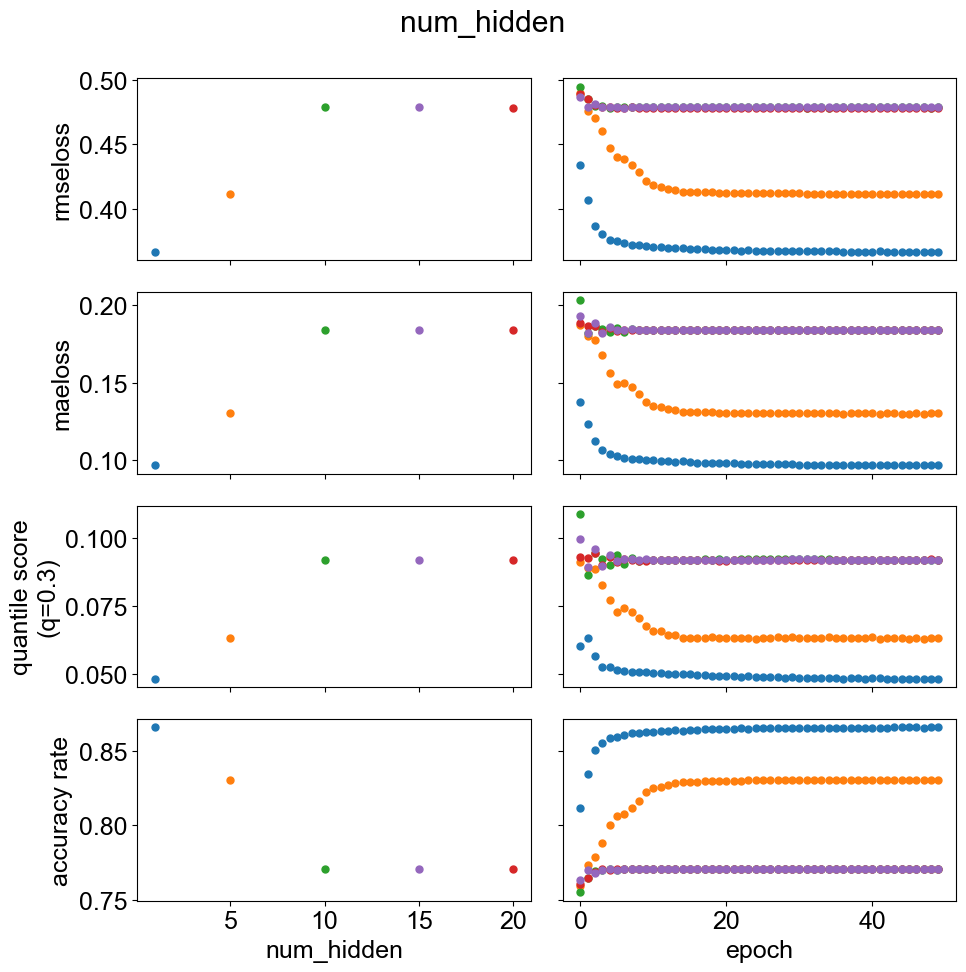

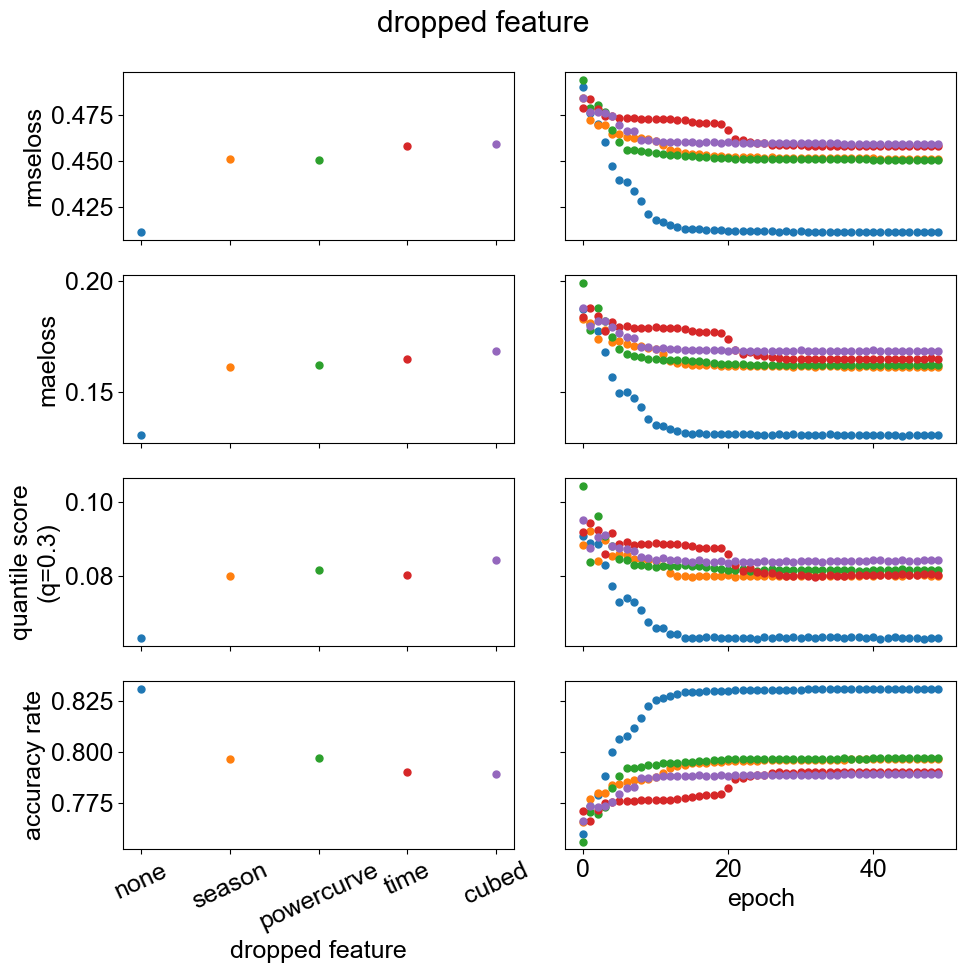

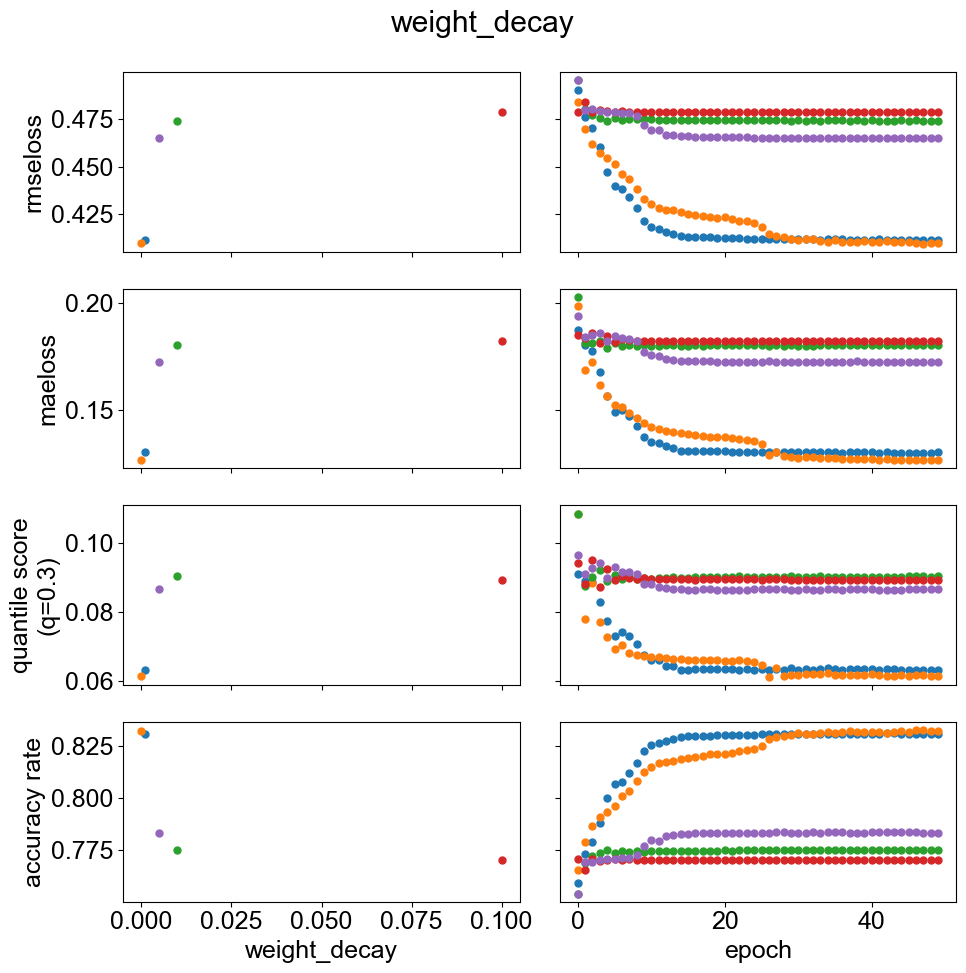

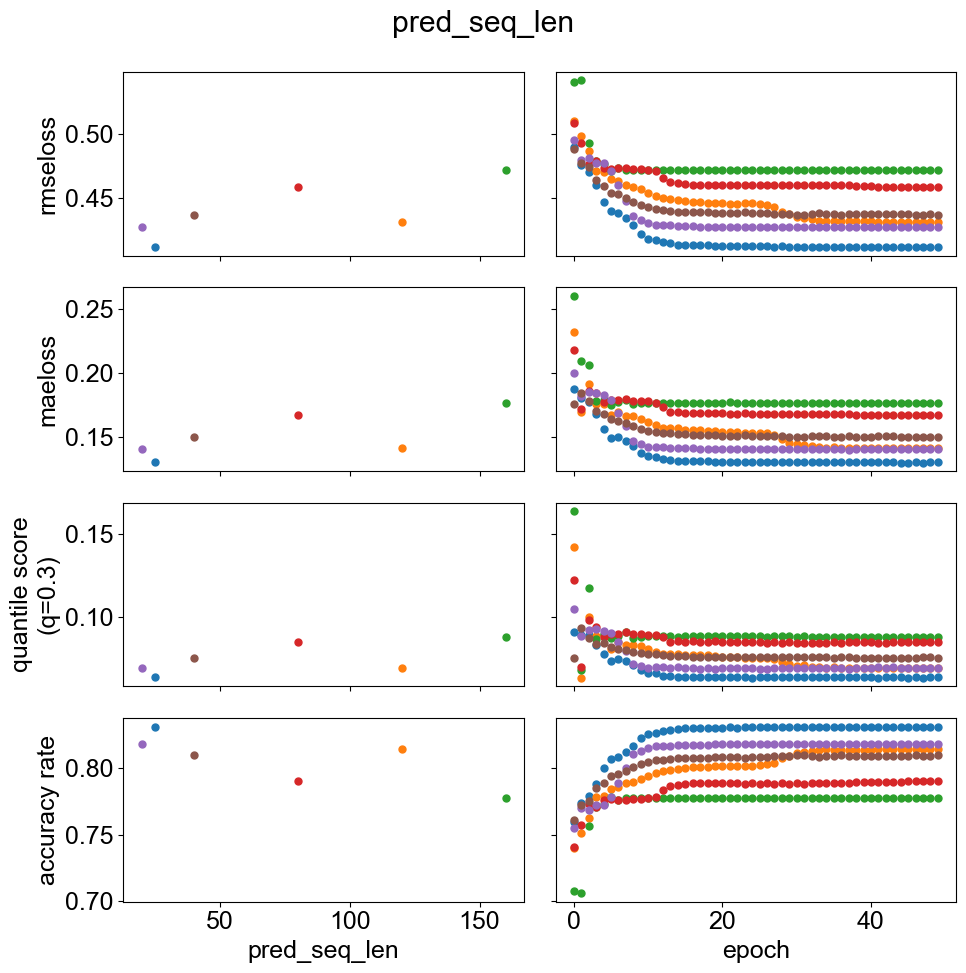

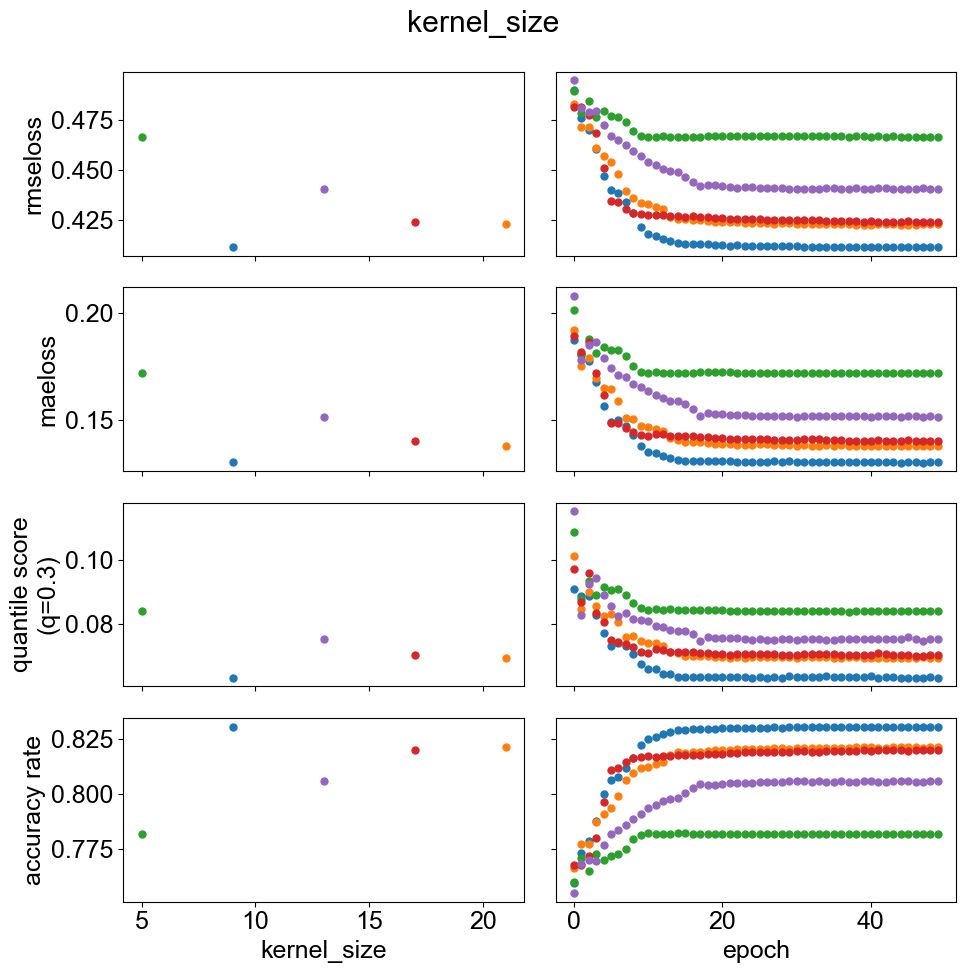

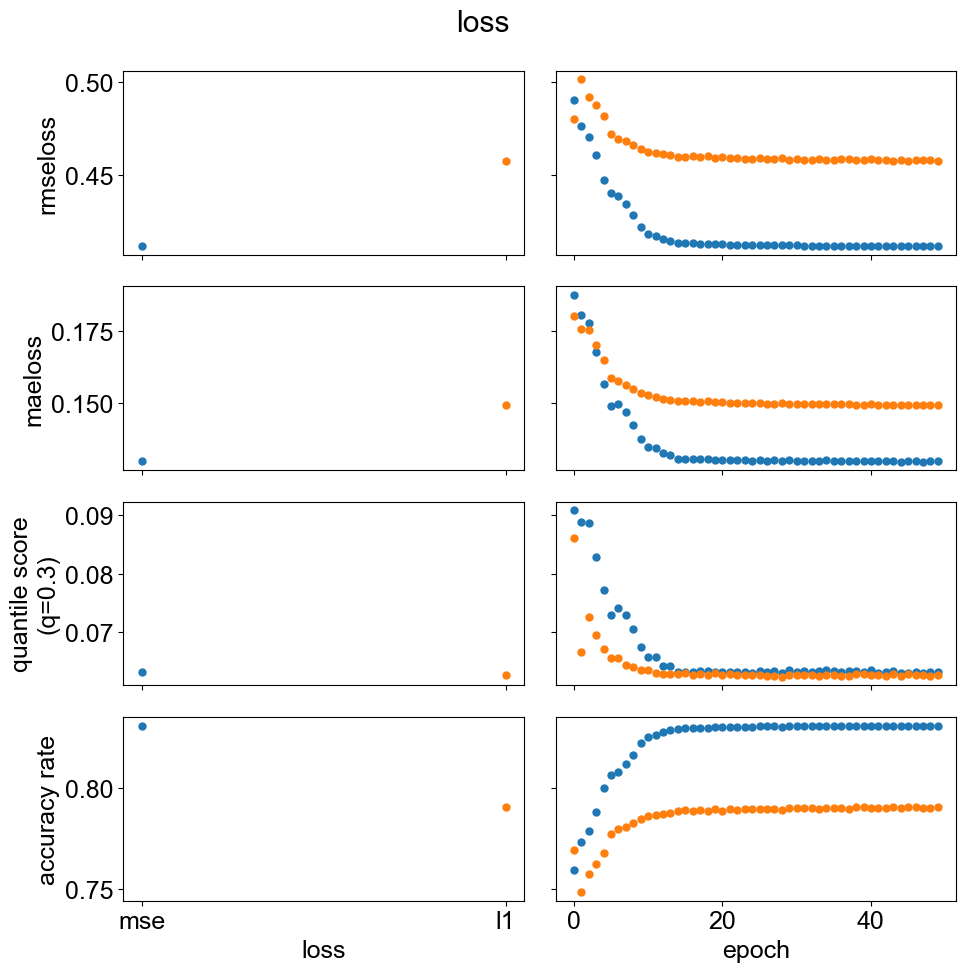

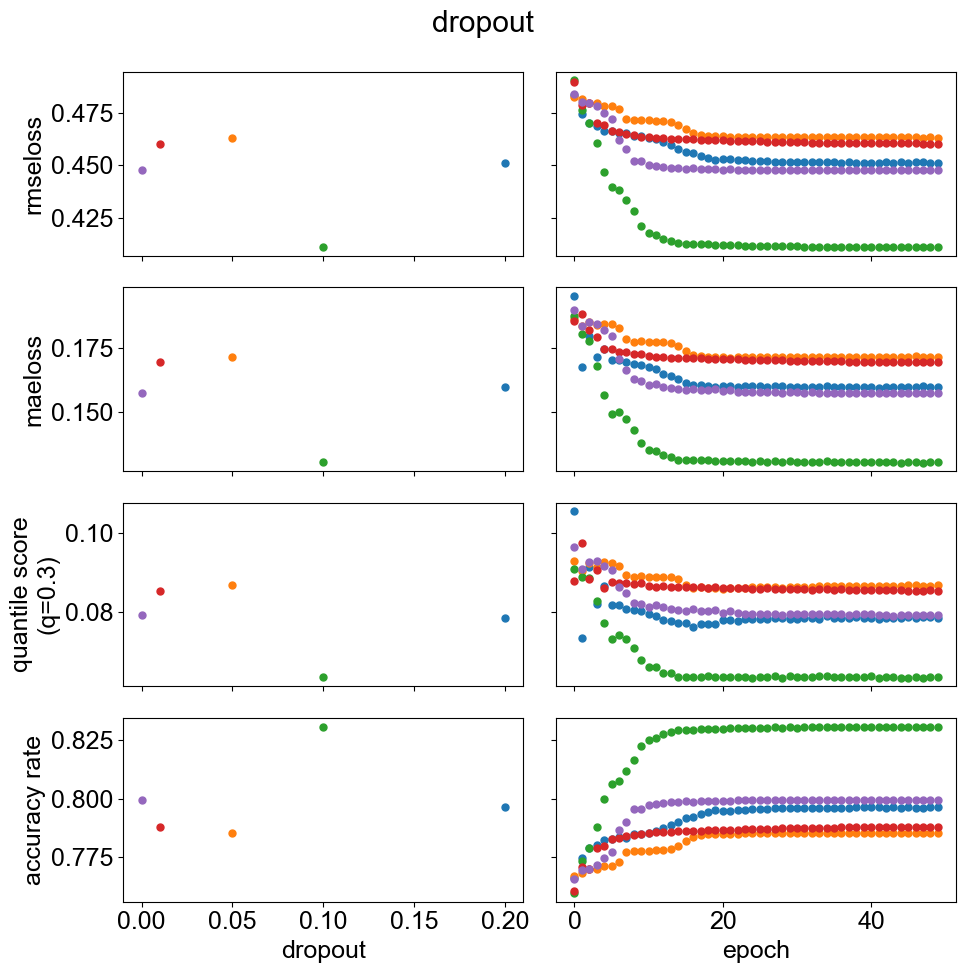

{'type': 'cnn', 'train': array([0.06210509, 0.03269065, 0.02646387, 0.02367563, 0.0223731 ,
       0.02159986, 0.02107353, 0.0207658 , 0.02052011, 0.02029595,
       0.02010399, 0.01997067, 0.01979839, 0.01972185, 0.0195912 ,
       0.01949337, 0.01939728, 0.01928601, 0.01921499, 0.01911294,
       0.01905815, 0.01900532, 0.01892132, 0.01891819, 0.01887572,
       0.01884345, 0.01881152, 0.01875586, 0.01875227, 0.01871678,
       0.01868435, 0.01868134, 0.01863809, 0.01862719, 0.01863665,
       0.01861179, 0.0185843 , 0.01854798, 0.01853366, 0.0185362 ,
       0.01852377, 0.01851158, 0.0185056 , 0.01849376, 0.01849573,
       0.01846079, 0.01846751, 0.01844567, 0.01844182, 0.01844304]), 'rmseloss': array([0.43423828, 0.40672738, 0.38661787, 0.38055809, 0.37596092,
       0.3748056 , 0.37293167, 0.37191117, 0.37138549, 0.37087654,
       0.3705014 , 0.37008132, 0.36962325, 0.36927335, 0.36930568,
       0.36892106, 0.36846389, 0.36838882, 0.36812195, 0.36787507,
       0.36777217, 0.36

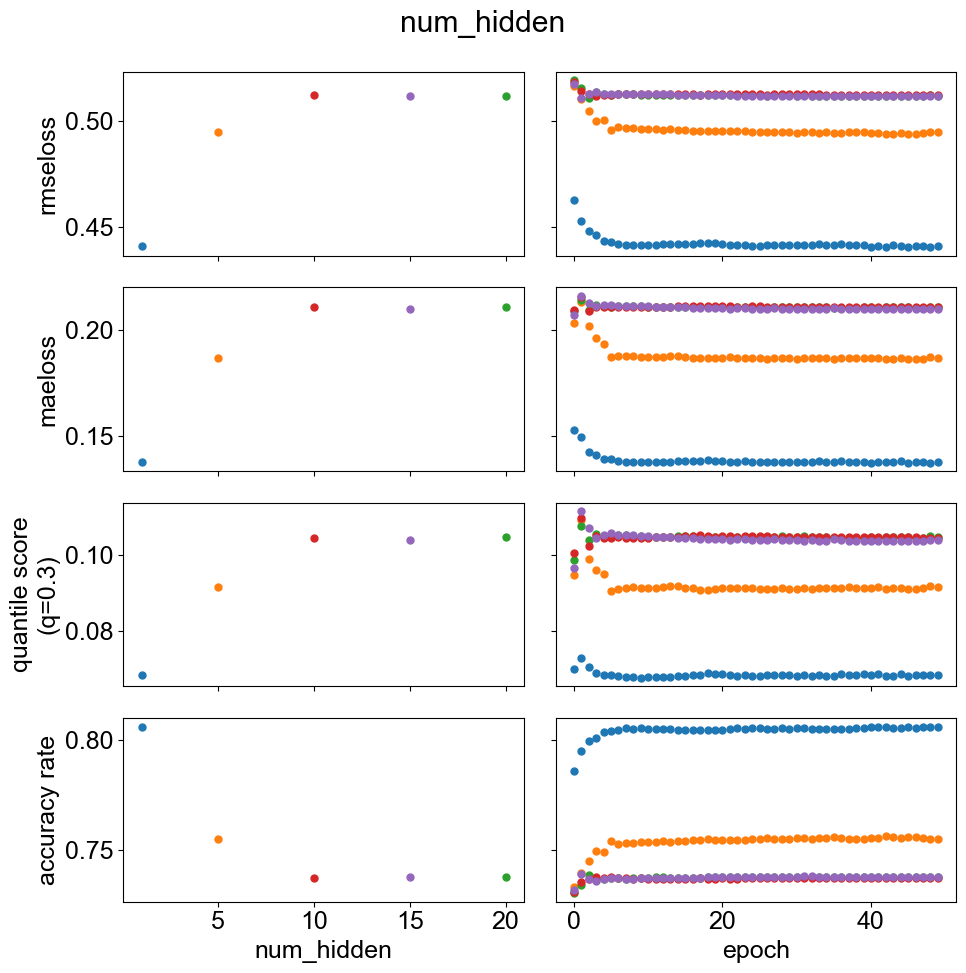

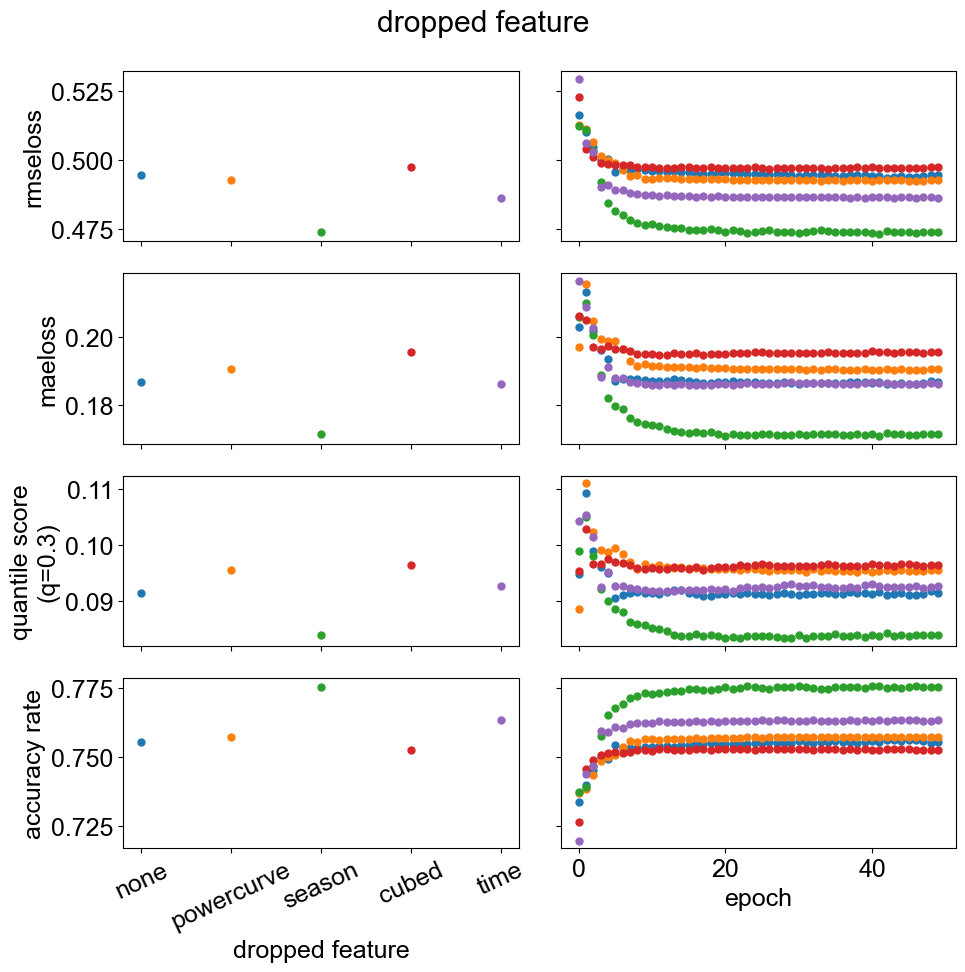

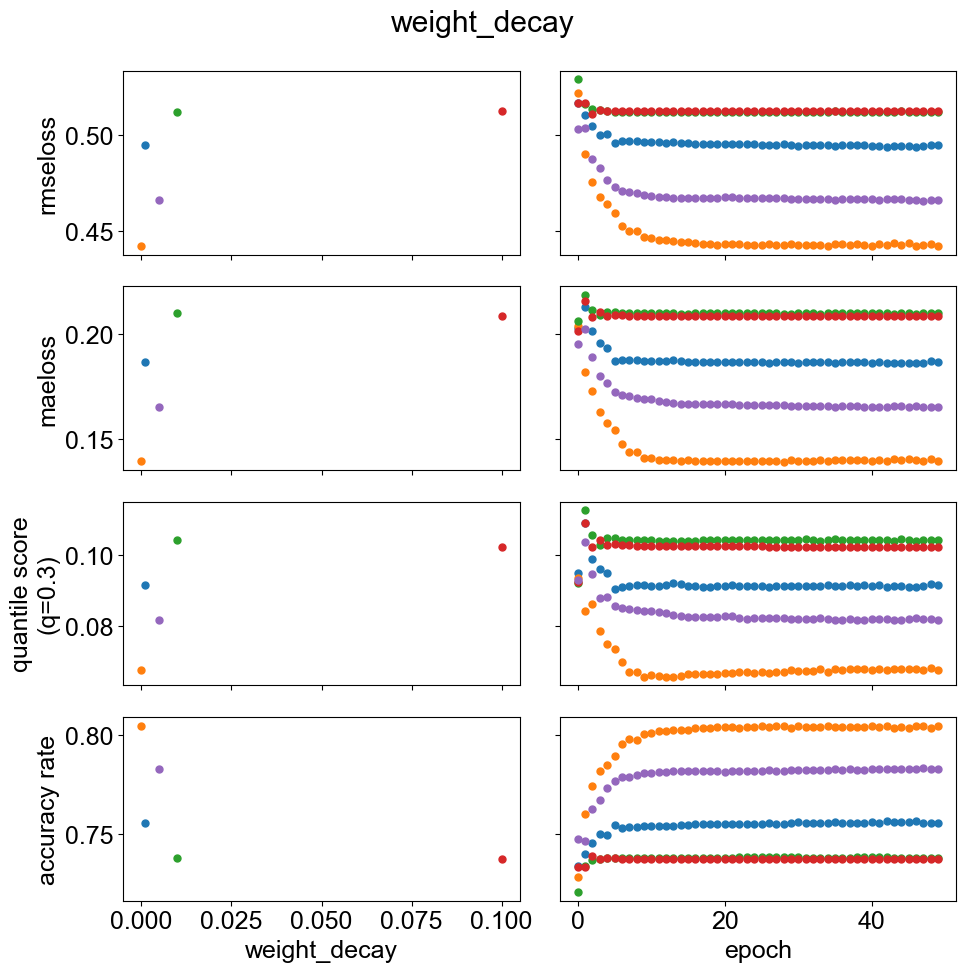

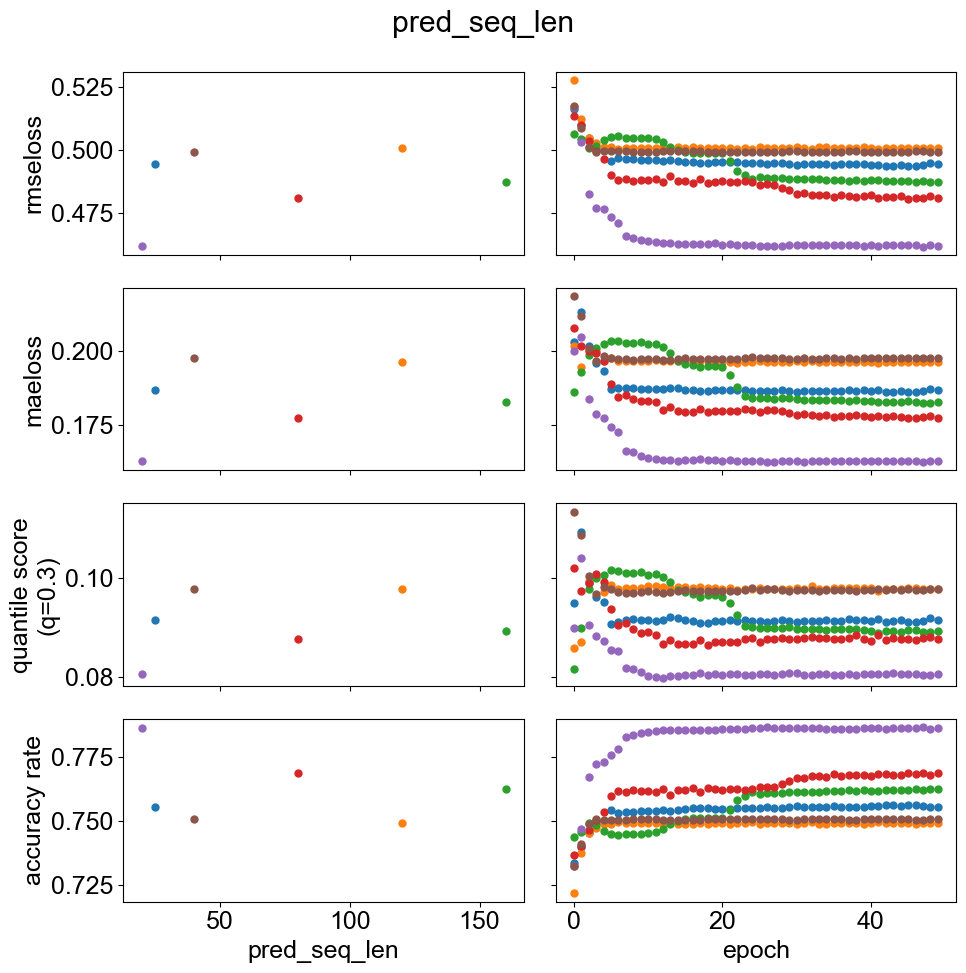

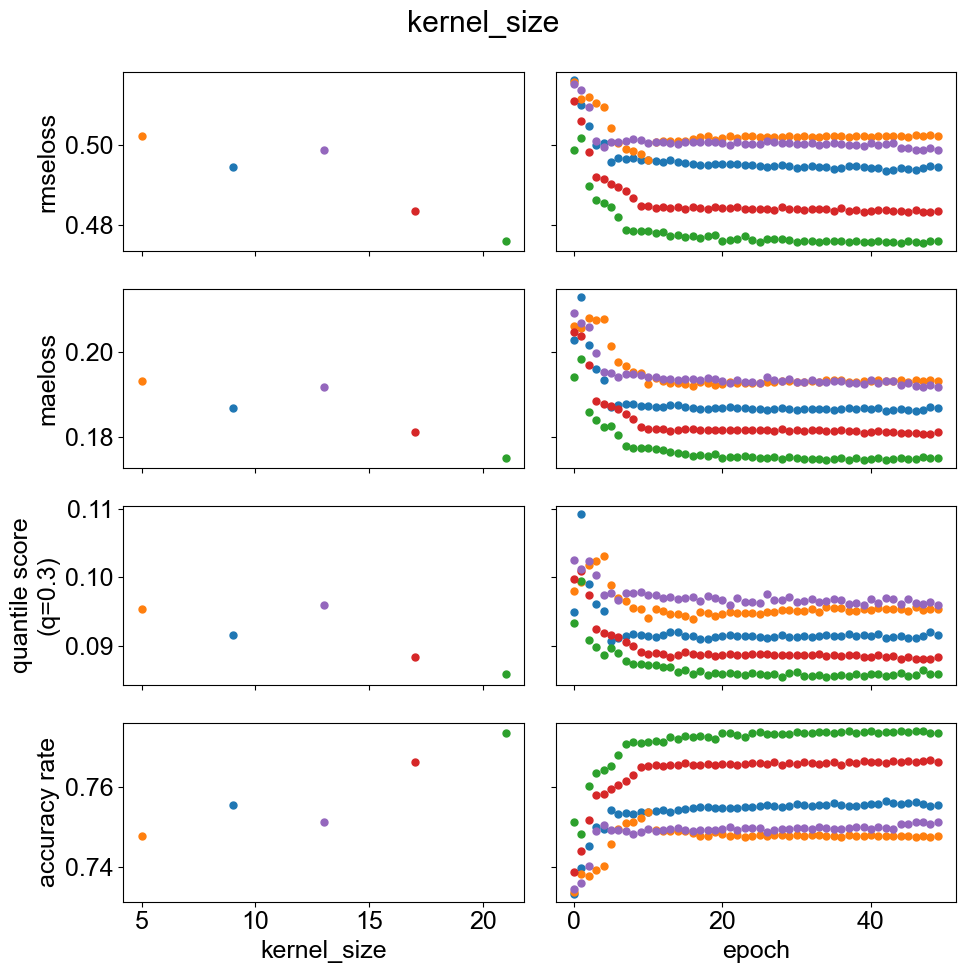

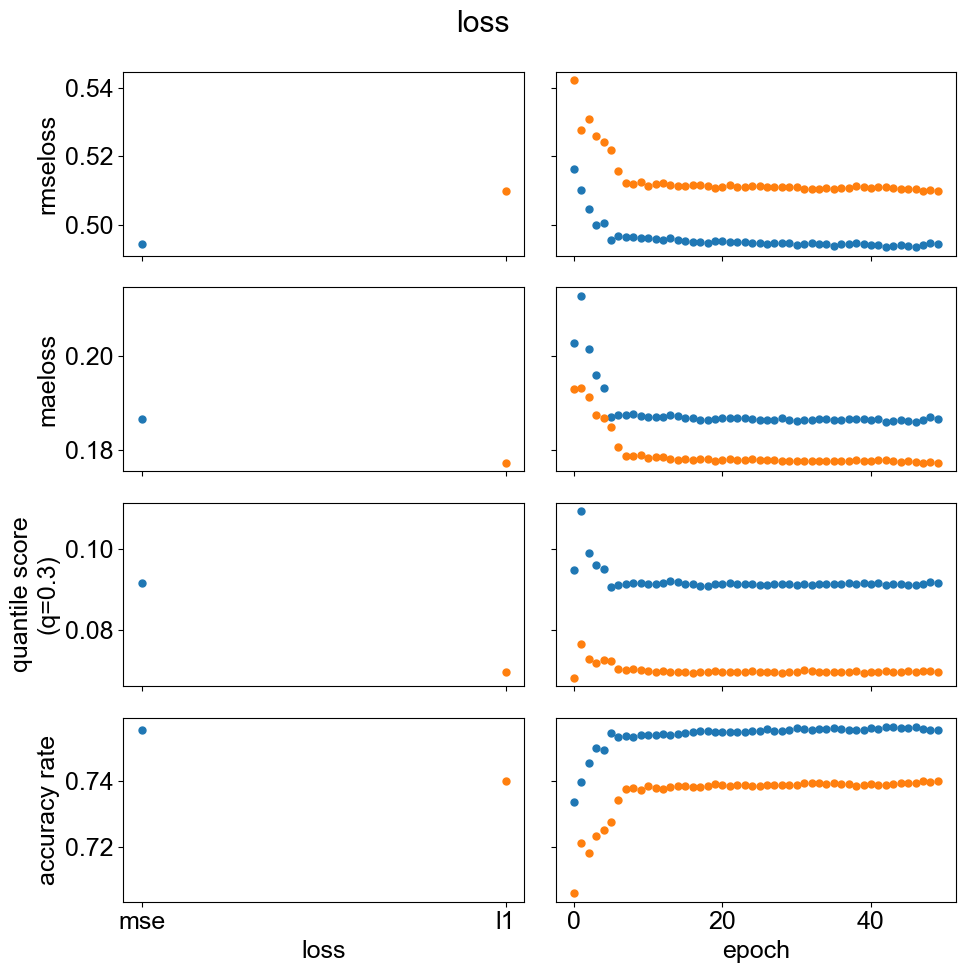

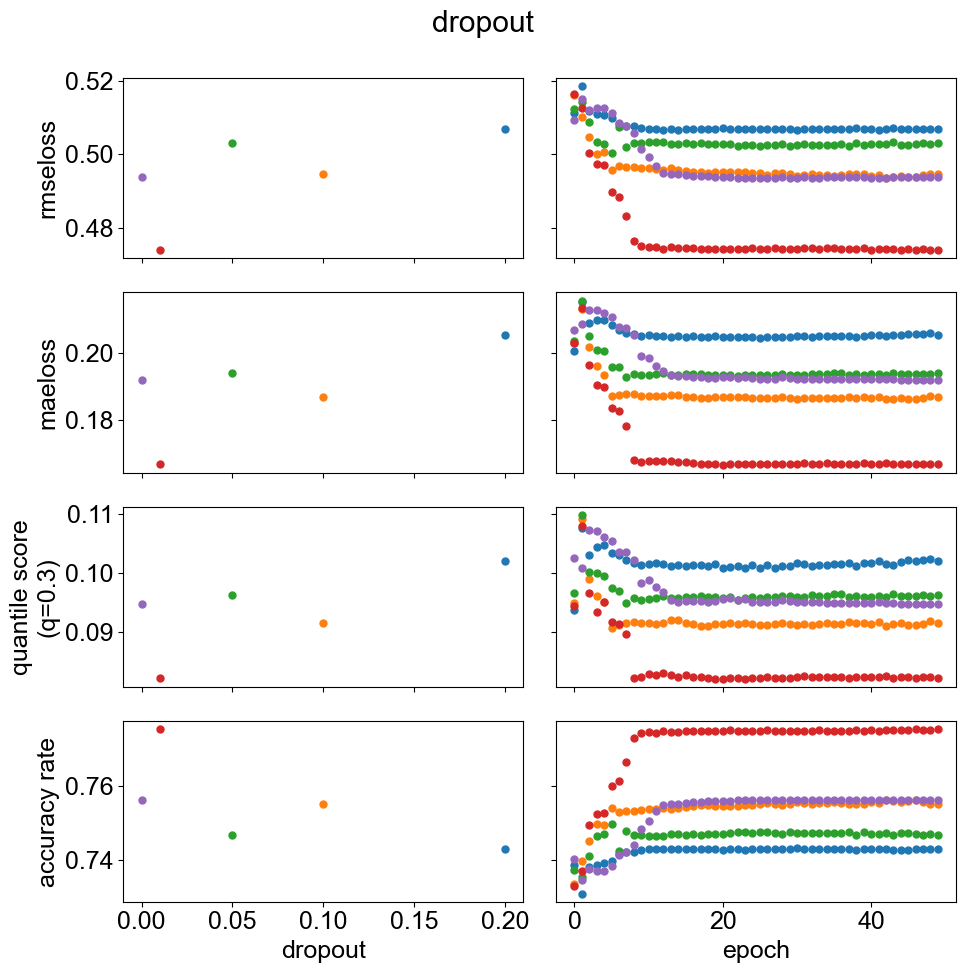

{'type': 'cnn', 'train': array([0.06991495, 0.04516327, 0.04053511, 0.03875029, 0.03786649,
       0.03728505, 0.03684846, 0.0365145 , 0.03624836, 0.03609724,
       0.03588735, 0.03575805, 0.03565855, 0.03554105, 0.03546568,
       0.03537725, 0.03532709, 0.03526955, 0.03519173, 0.03510846,
       0.03502778, 0.03498614, 0.03495067, 0.03491134, 0.03485184,
       0.03482516, 0.03477652, 0.03476339, 0.03474214, 0.03470483,
       0.03470006, 0.03467074, 0.03466468, 0.03462698, 0.03459951,
       0.03457617, 0.03459647, 0.03456306, 0.03454259, 0.03449947,
       0.03448187, 0.03453448, 0.03448235, 0.0344708 , 0.03447621,
       0.03444212, 0.03445082, 0.03444192, 0.0344356 , 0.03443008]), 'rmseloss': array([0.46253408, 0.45279831, 0.44775157, 0.44600973, 0.4431843 ,
       0.44260081, 0.442033  , 0.44113798, 0.44142896, 0.44117422,
       0.44135764, 0.44157611, 0.44169453, 0.44160585, 0.44199743,
       0.44194244, 0.44195962, 0.44216793, 0.44232886, 0.44215849,
       0.4420379 , 0.44

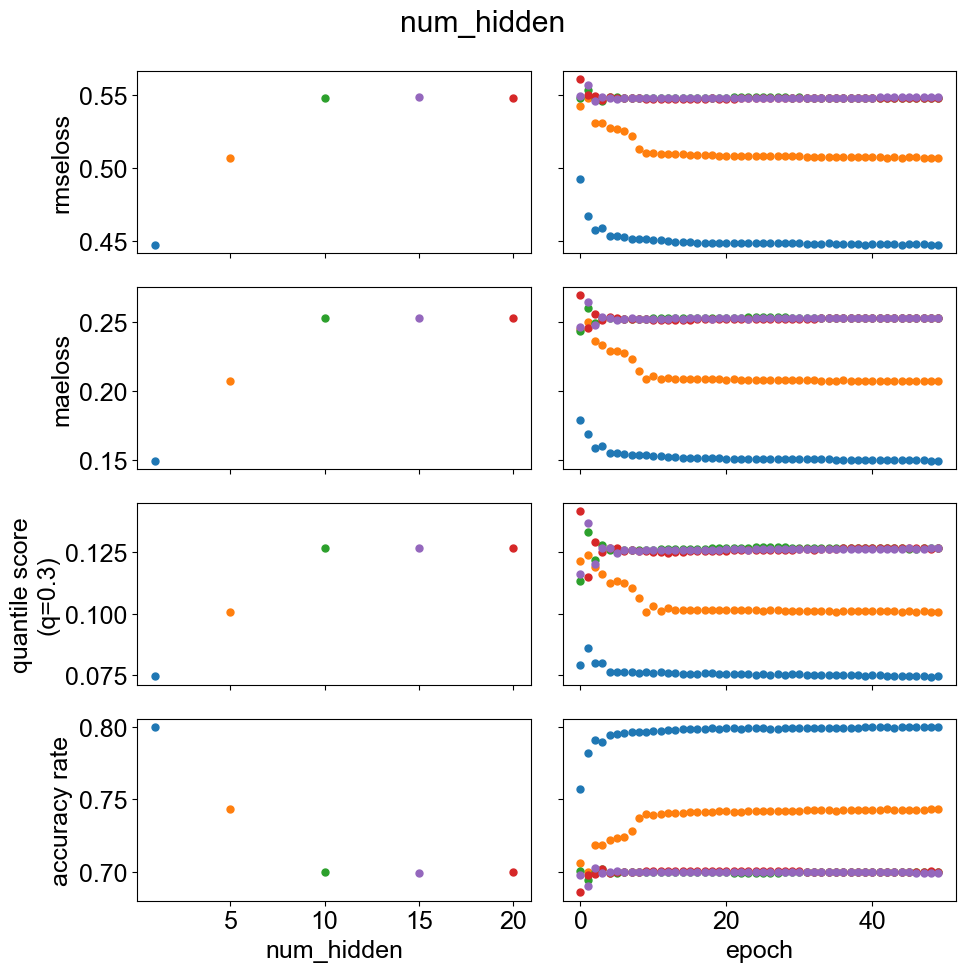

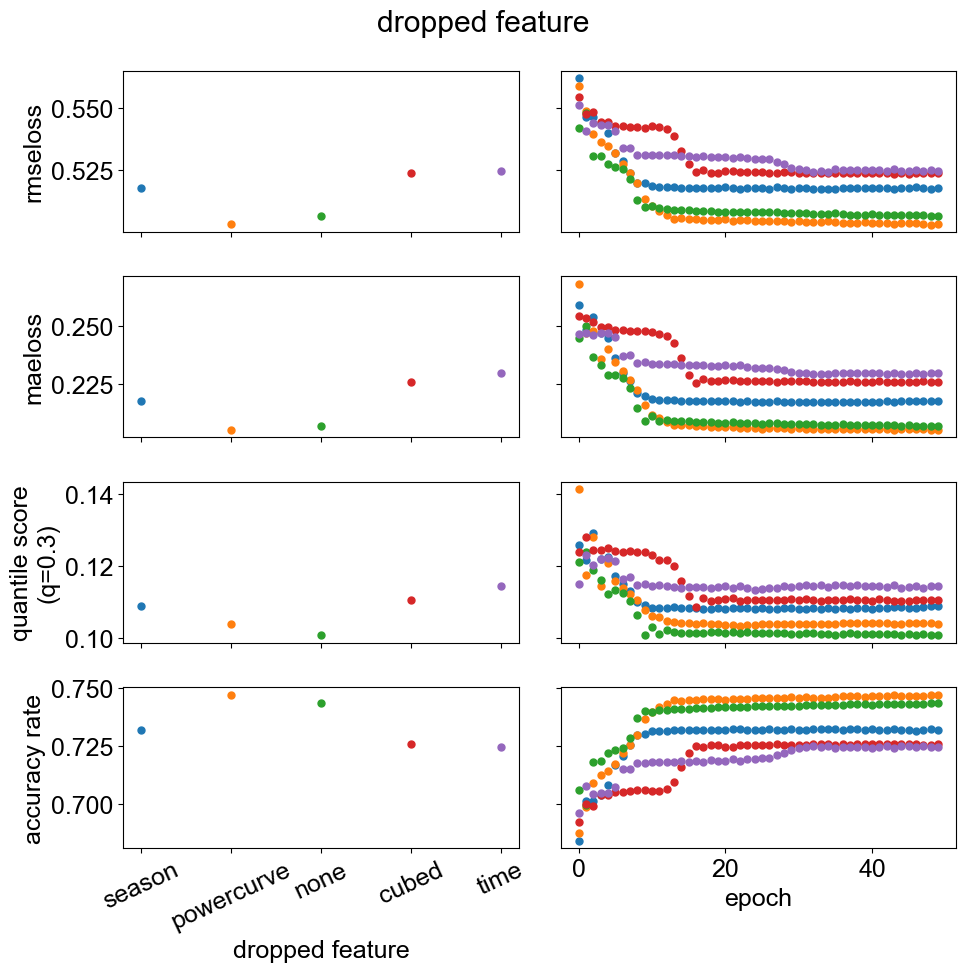

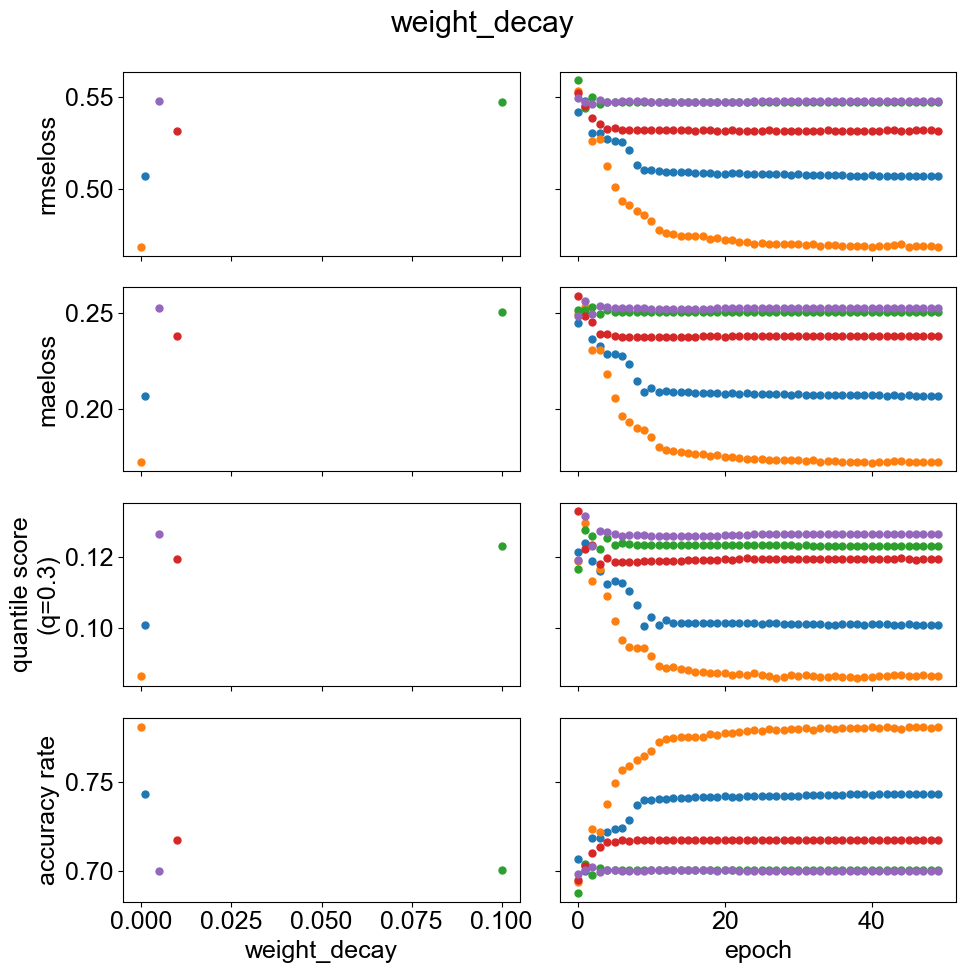

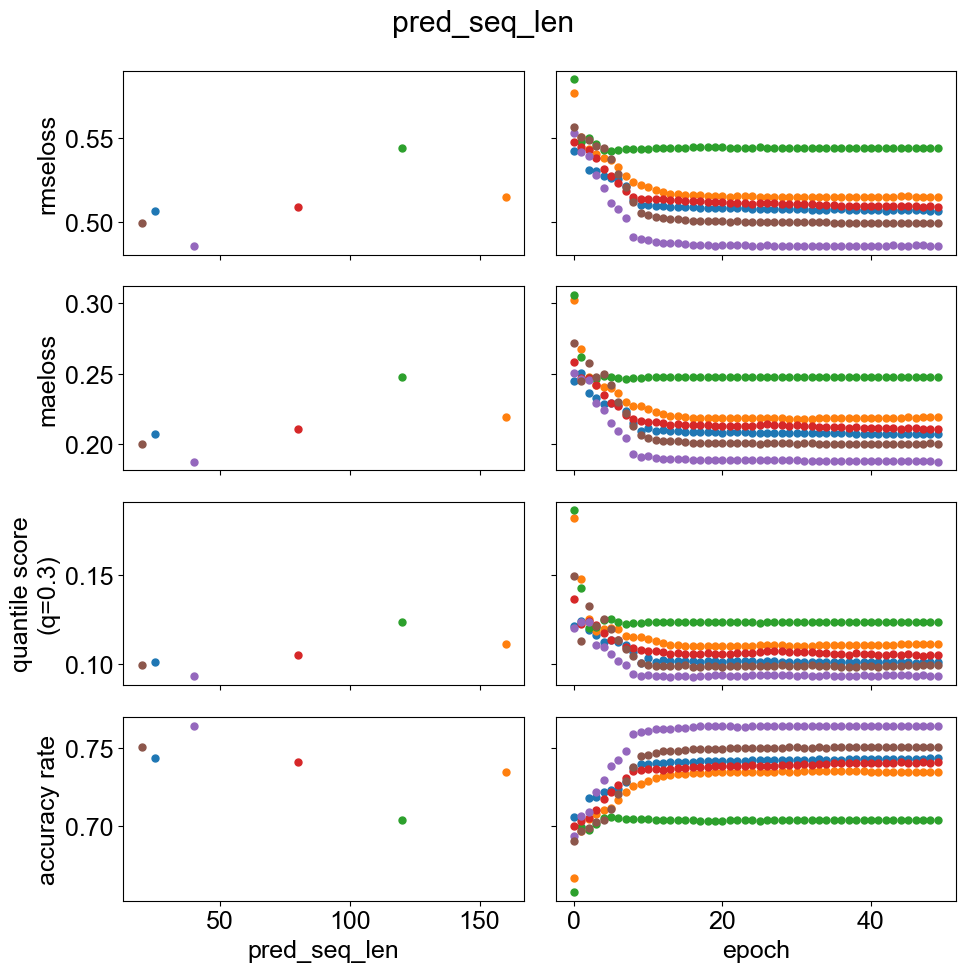

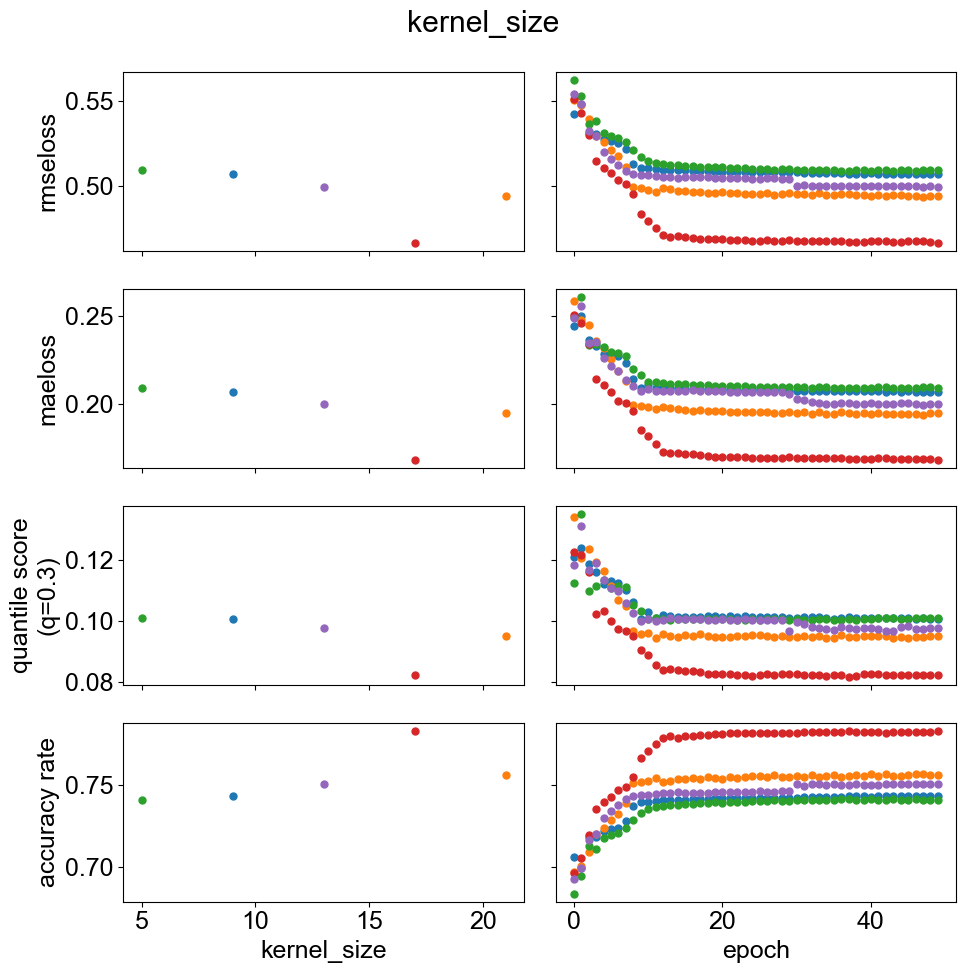

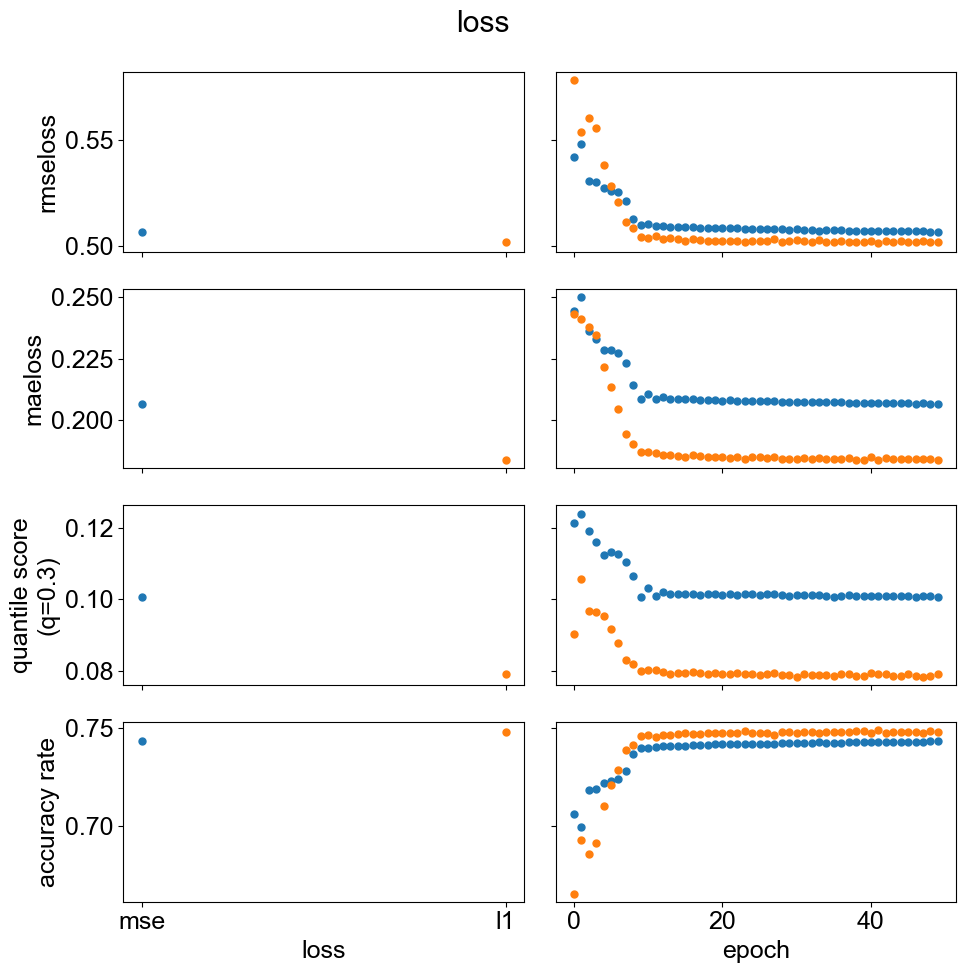

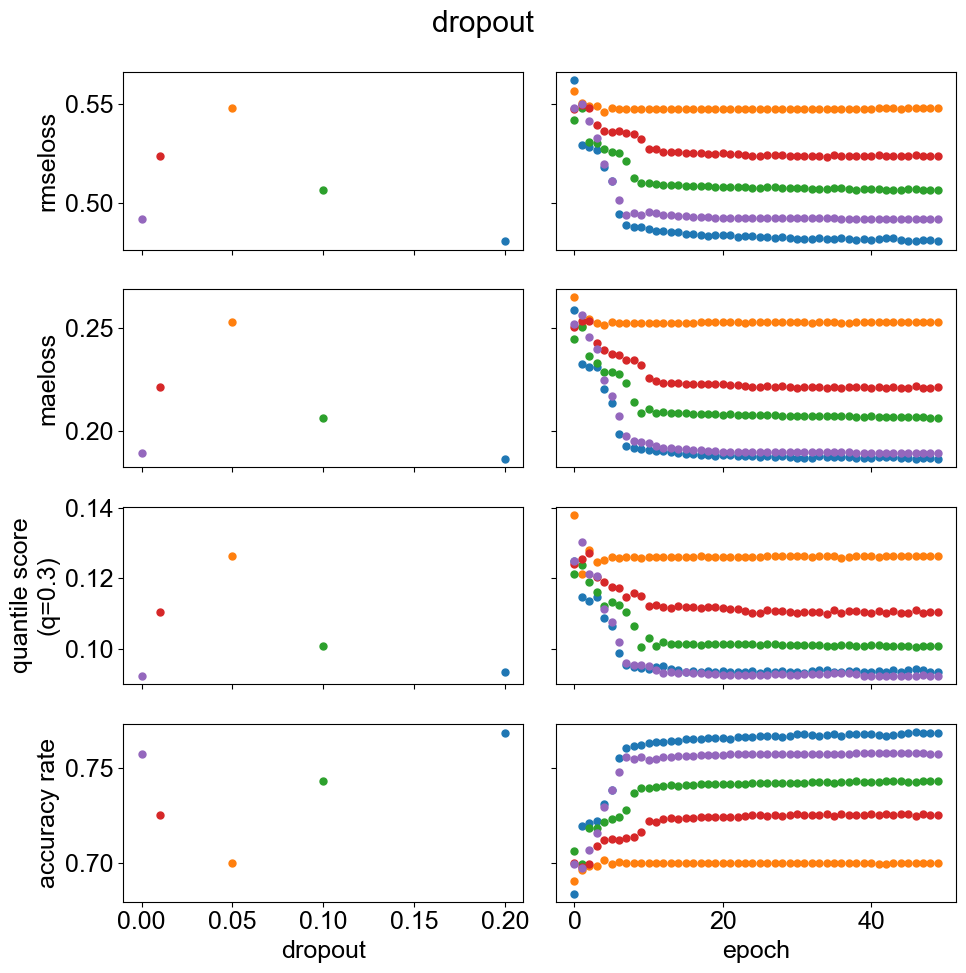

{'type': 'cnn', 'train': array([0.08218975, 0.05300757, 0.04739644, 0.04482941, 0.04348922,
       0.04263625, 0.04206657, 0.04169197, 0.0412945 , 0.04093401,
       0.04063565, 0.04041337, 0.04019812, 0.0399922 , 0.03985002,
       0.03973838, 0.03963176, 0.03953318, 0.03944713, 0.03937488,
       0.03926403, 0.03920763, 0.0391631 , 0.03912305, 0.039065  ,
       0.03903016, 0.03894792, 0.03894348, 0.03884539, 0.03881462,
       0.0388199 , 0.03878609, 0.03873087, 0.03873209, 0.03868574,
       0.03864818, 0.03861767, 0.03860393, 0.03860511, 0.03854667,
       0.0385415 , 0.03853072, 0.03853408, 0.03849323, 0.03846129,
       0.03846069, 0.03843069, 0.03837813, 0.03836493, 0.03836064]), 'rmseloss': array([0.49243421, 0.46679772, 0.45696542, 0.45876953, 0.45324721,
       0.45284449, 0.45206458, 0.45122738, 0.45071266, 0.45083317,
       0.45040456, 0.45020609, 0.44963735, 0.44920884, 0.44904945,
       0.44889127, 0.44834002, 0.44829752, 0.44811728, 0.44845462,
       0.44797698, 0.44

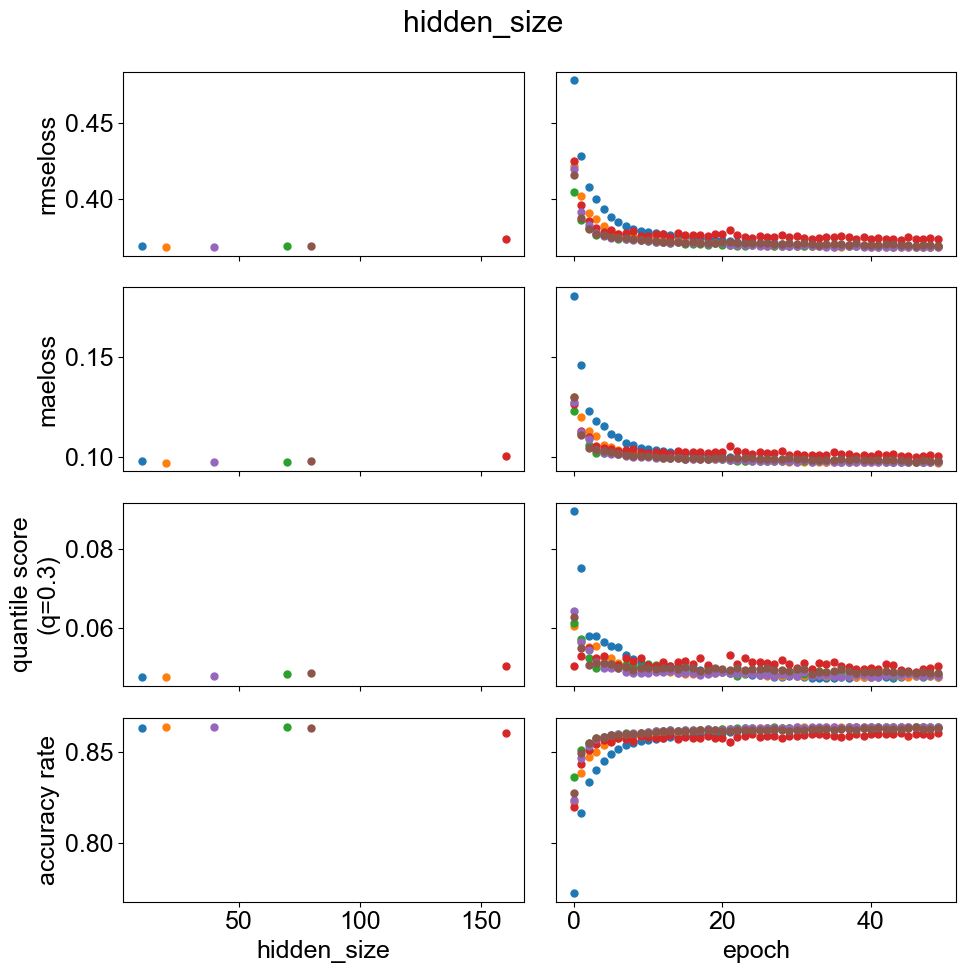

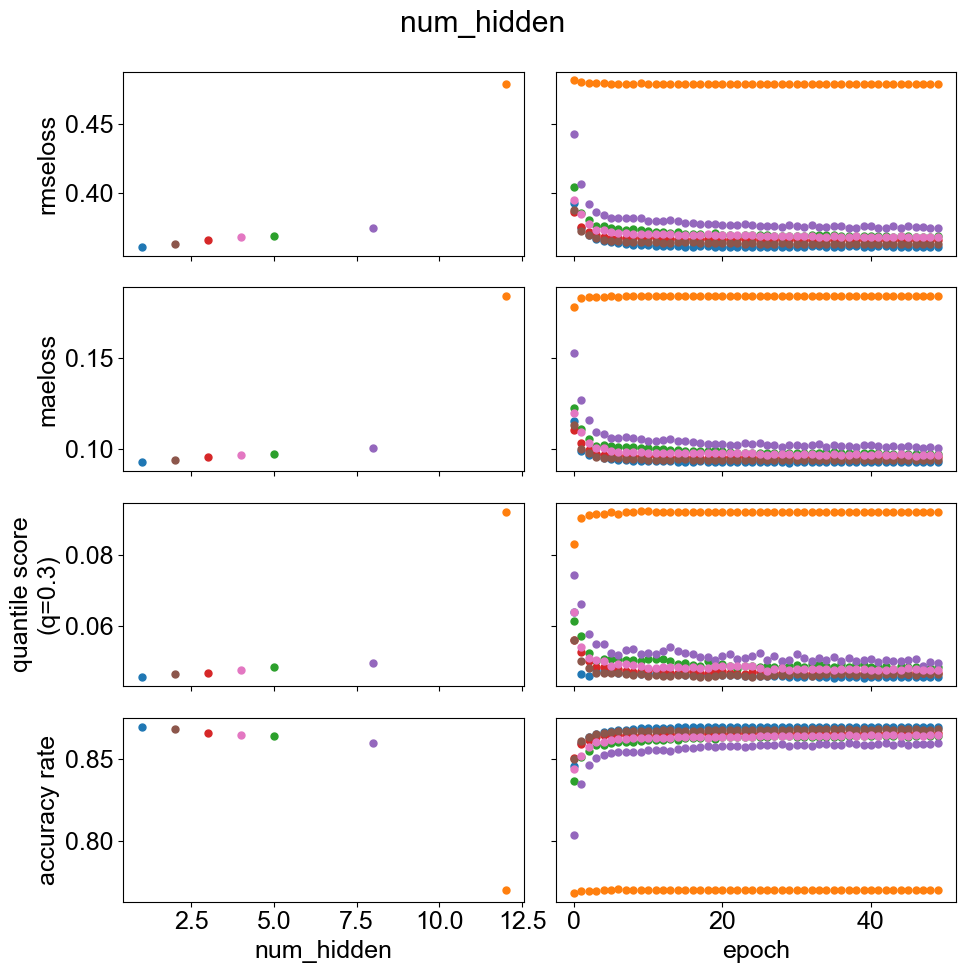

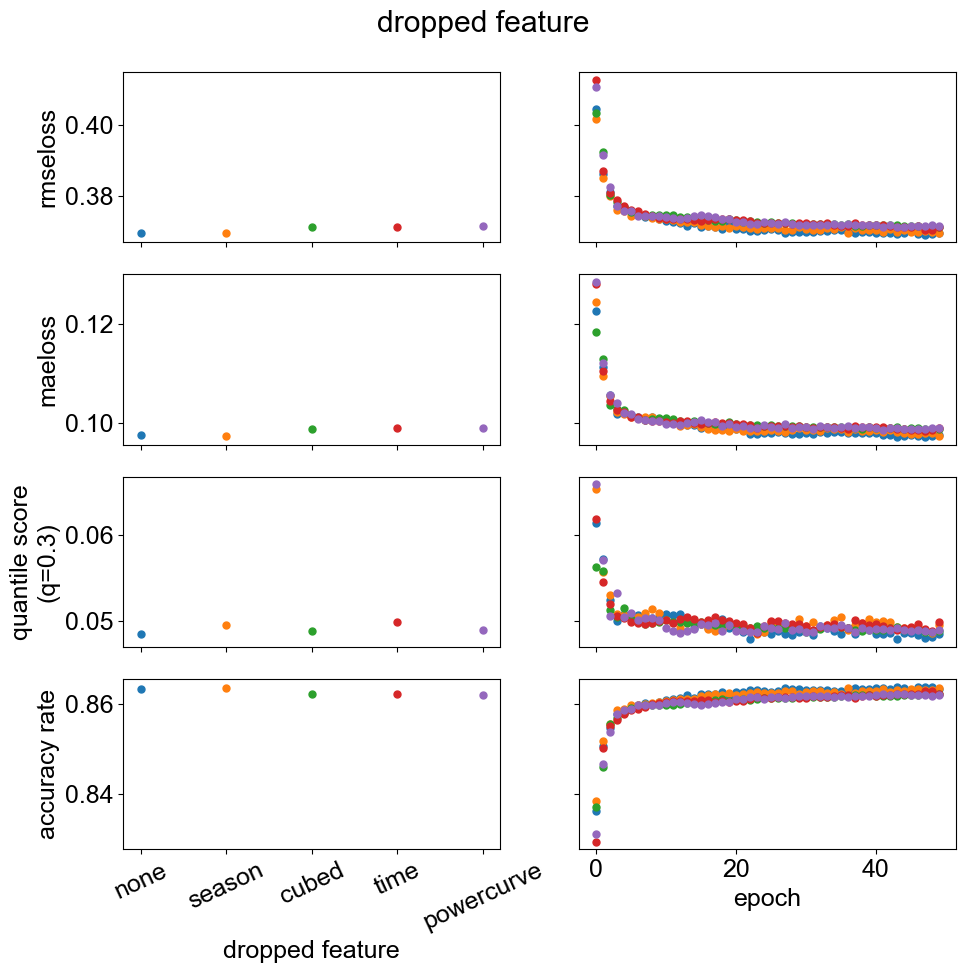

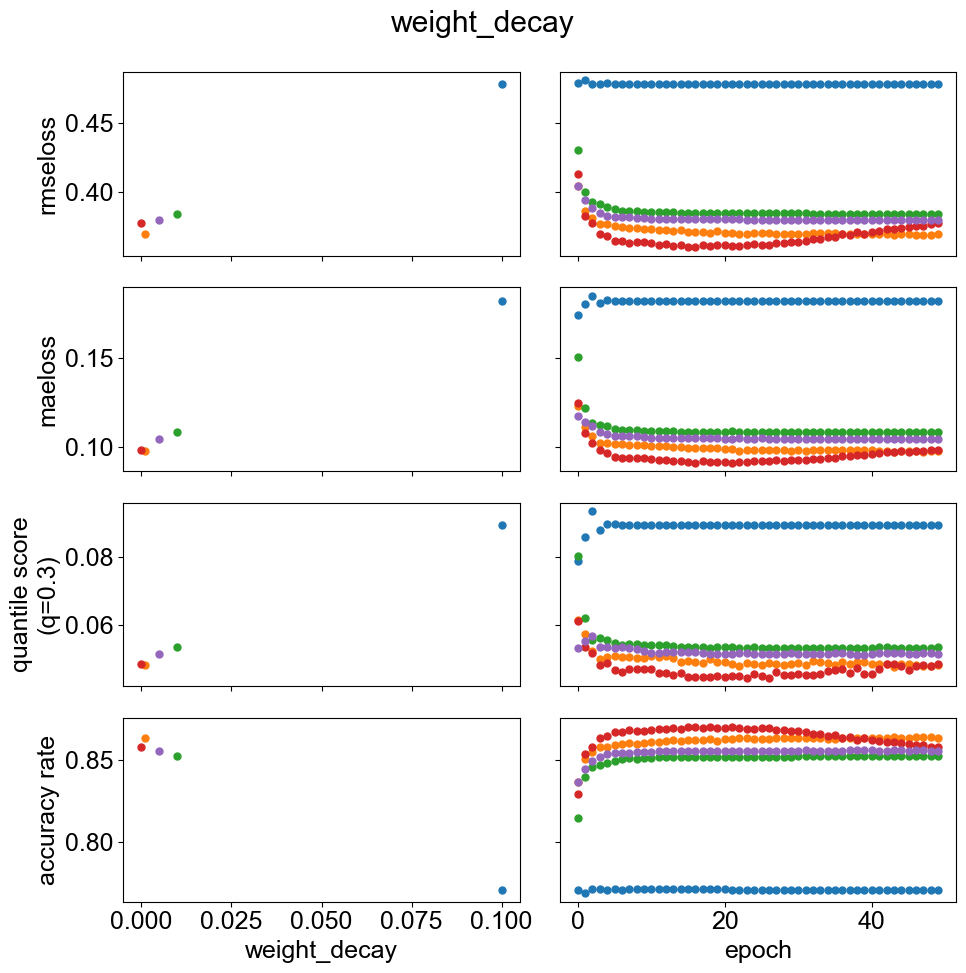

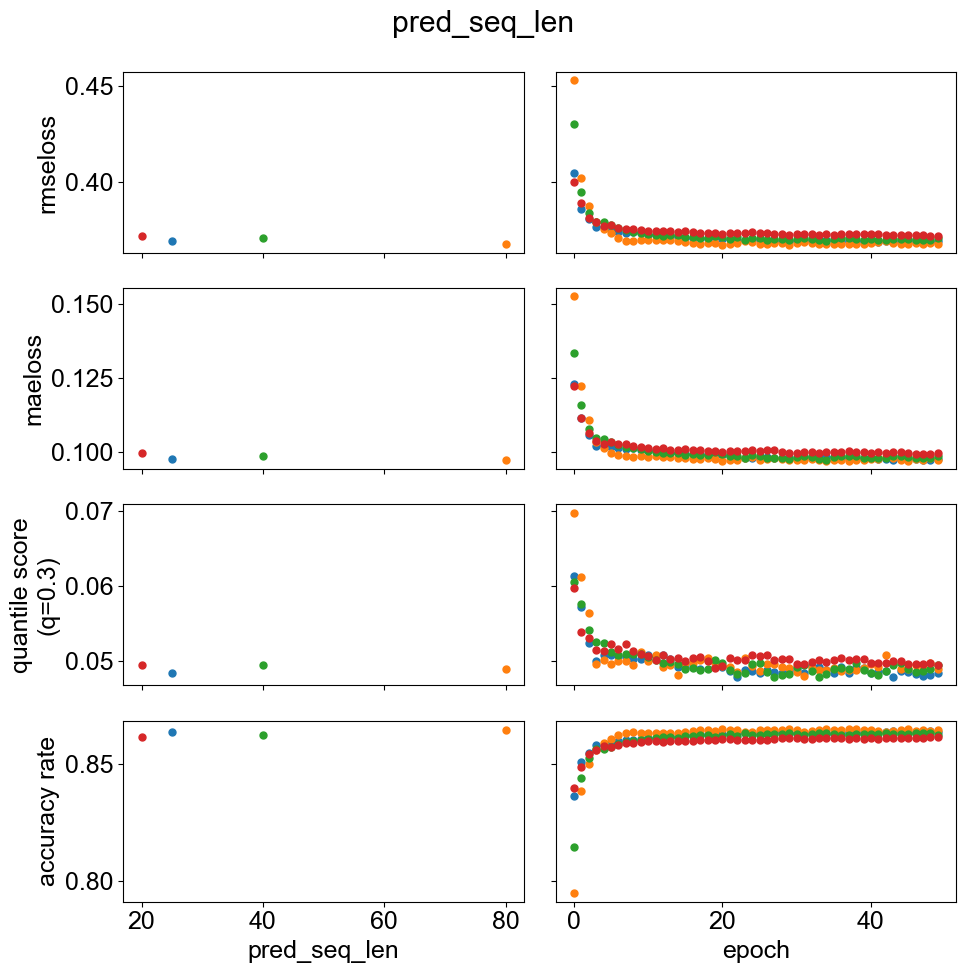

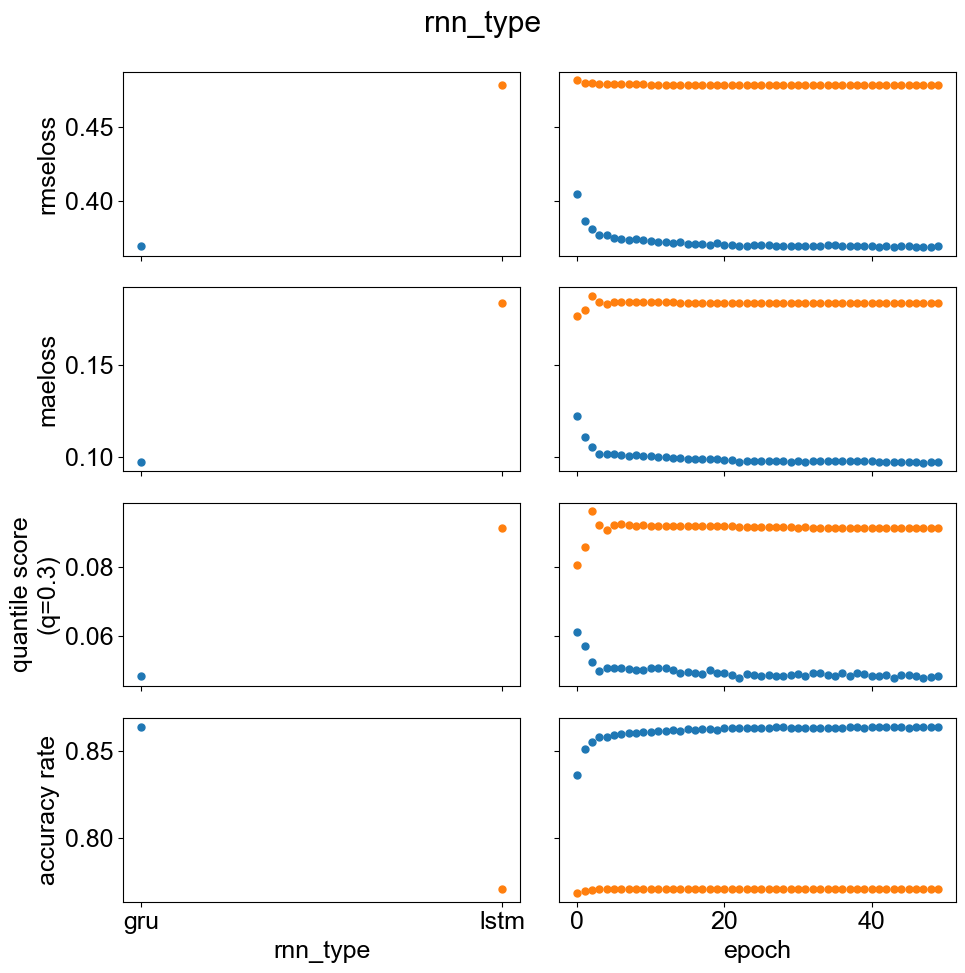

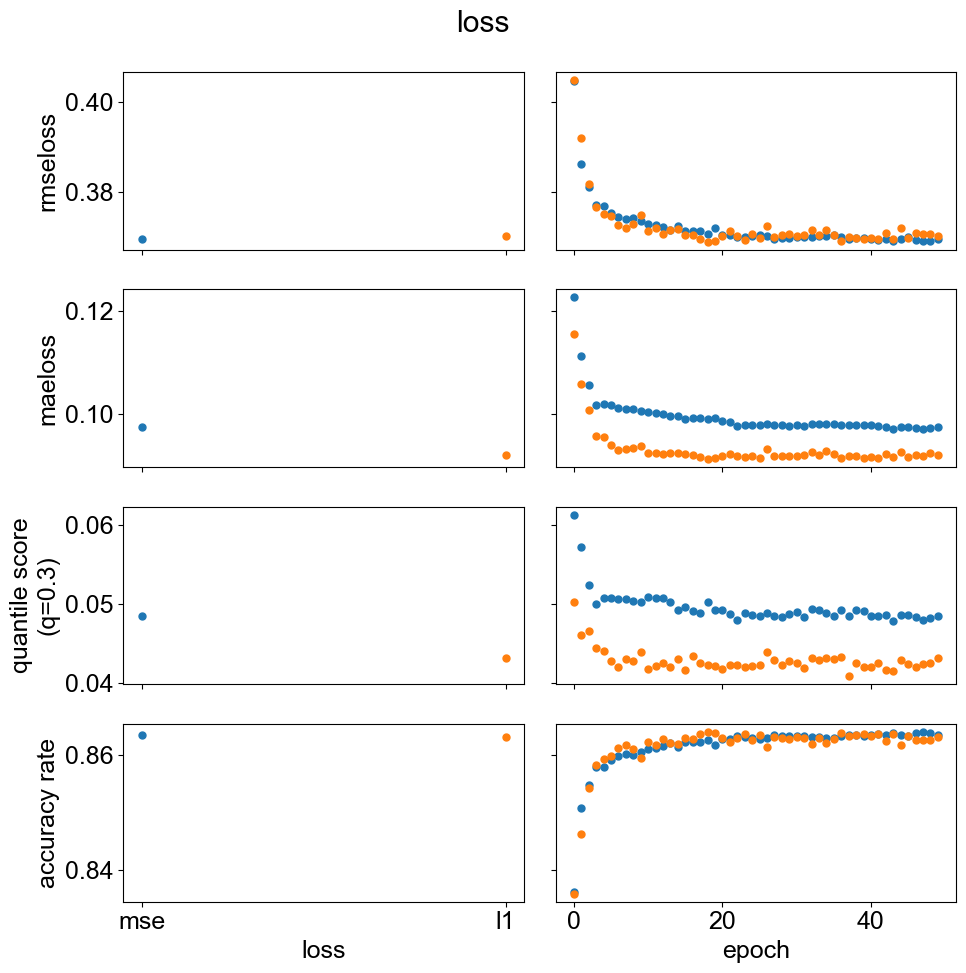

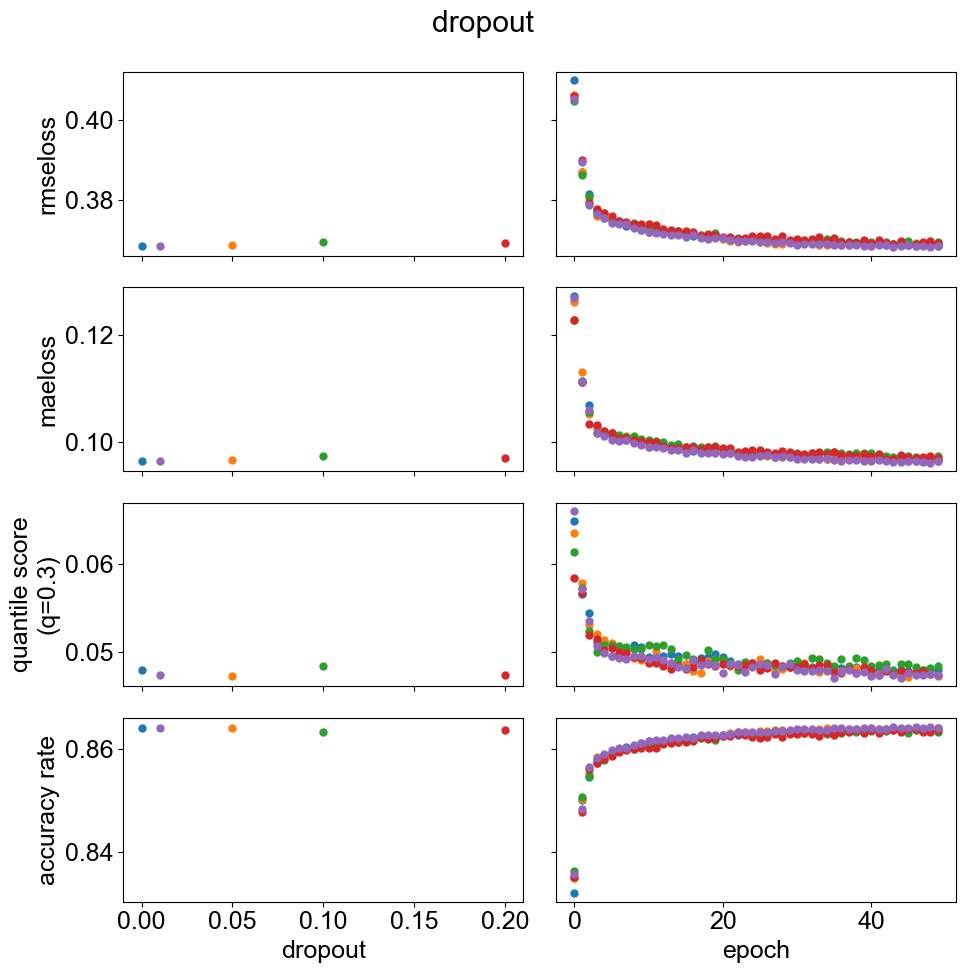

{'type': 'rnn', 'train': array([0.04496763, 0.02207892, 0.01951458, 0.01865428, 0.01816592,
       0.01783204, 0.01762594, 0.01746462, 0.01734628, 0.01724662,
       0.01716872, 0.01711727, 0.01706687, 0.01701841, 0.01698603,
       0.01696669, 0.01694499, 0.01693153, 0.01689393, 0.01686156,
       0.0168381 , 0.01682431, 0.01681072, 0.01681077, 0.01680523,
       0.01678173, 0.01675994, 0.01674578, 0.01672493, 0.0167194 ,
       0.01671845, 0.01671875, 0.01671826, 0.01670259, 0.01668513,
       0.0166861 , 0.01667714, 0.01666859, 0.01666108, 0.01665228,
       0.01664131, 0.01663738, 0.01662302, 0.01661092, 0.01661241,
       0.01662775, 0.01661253, 0.016605  , 0.01658857, 0.01657824]), 'rmseloss': array([0.3929904 , 0.3748753 , 0.37009017, 0.36742649, 0.365809  ,
       0.36484941, 0.36426774, 0.36394432, 0.36334938, 0.36300445,
       0.36292598, 0.36264703, 0.36254589, 0.36236841, 0.36218132,
       0.36191874, 0.36182513, 0.36200449, 0.36198591, 0.36191357,
       0.36157746, 0.36

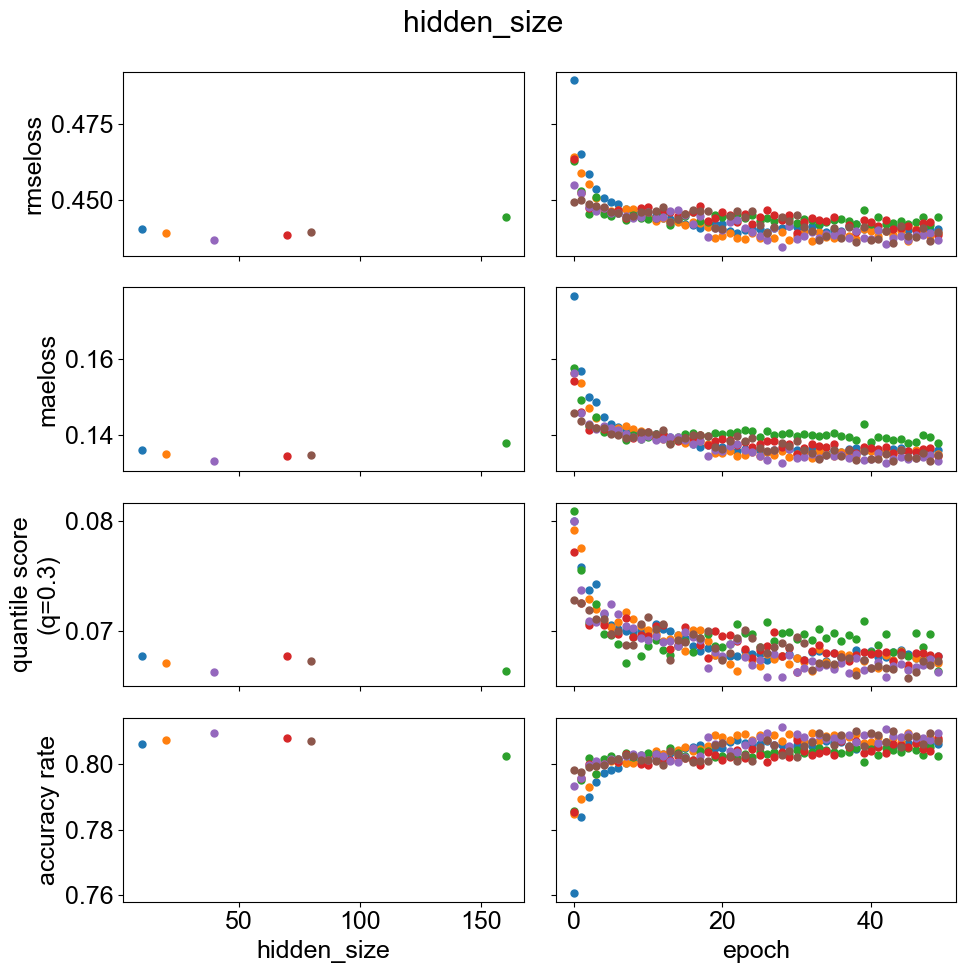

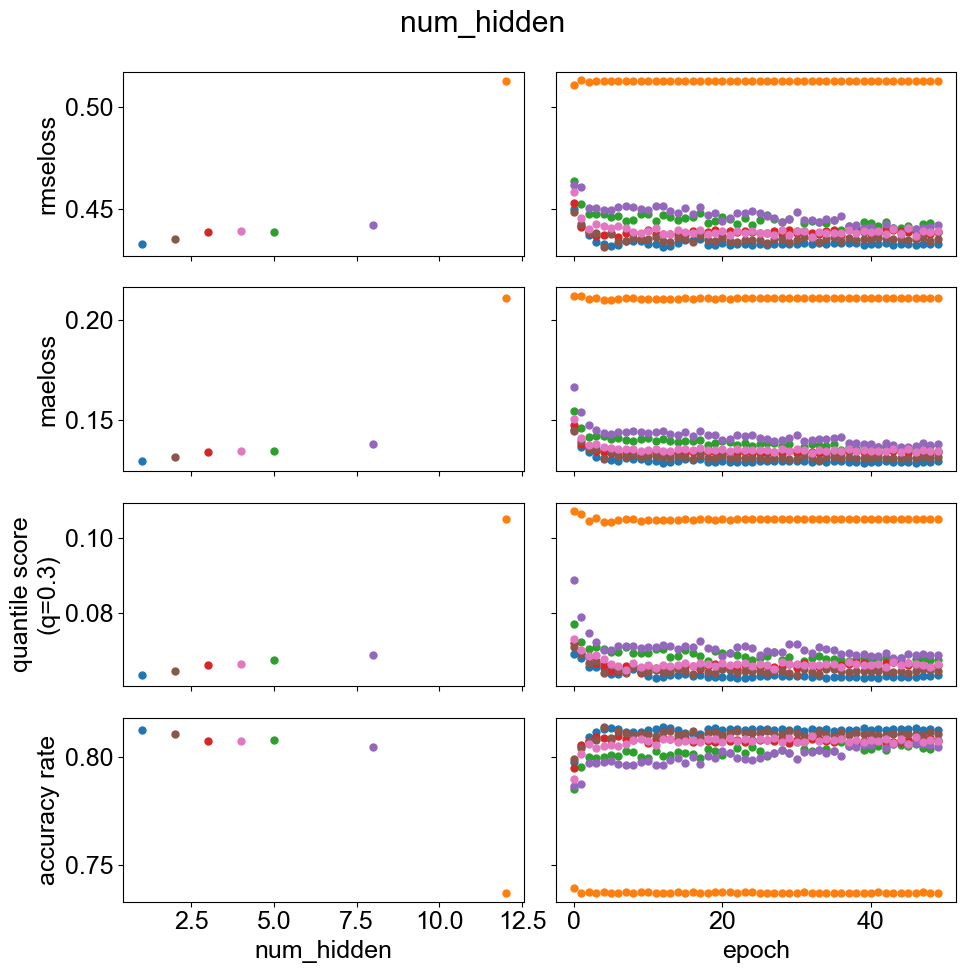

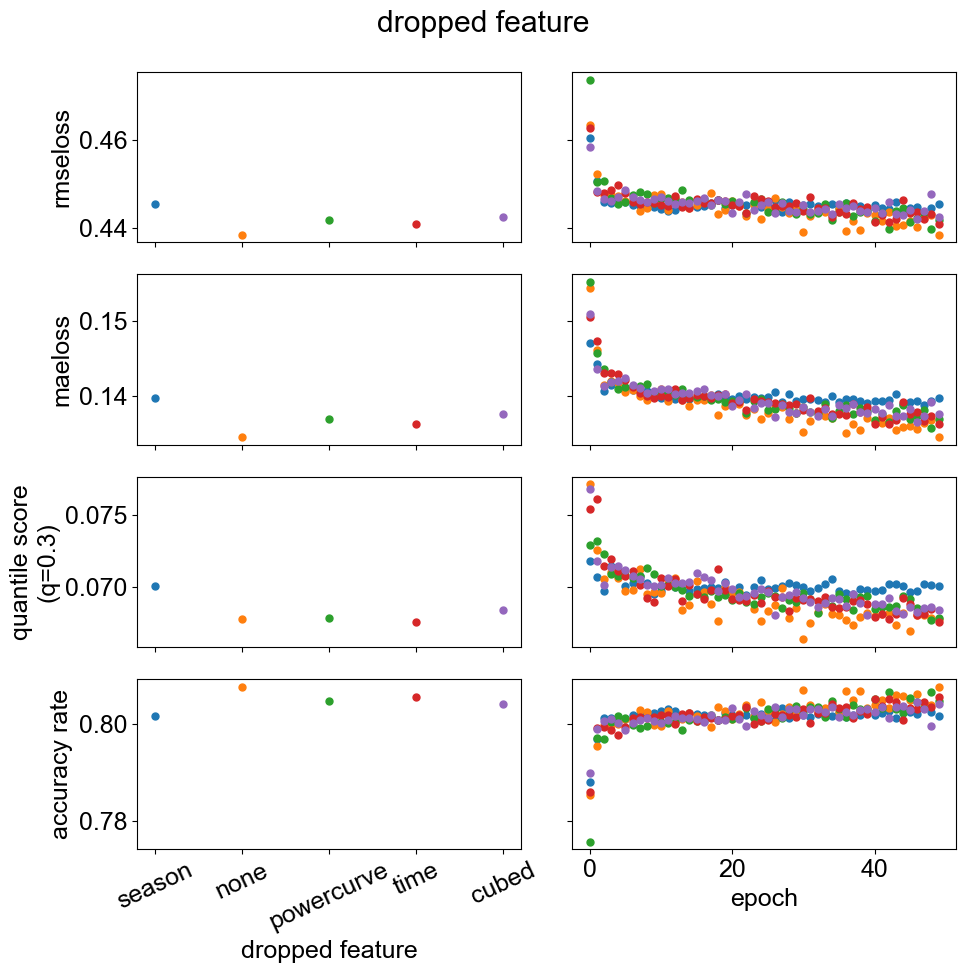

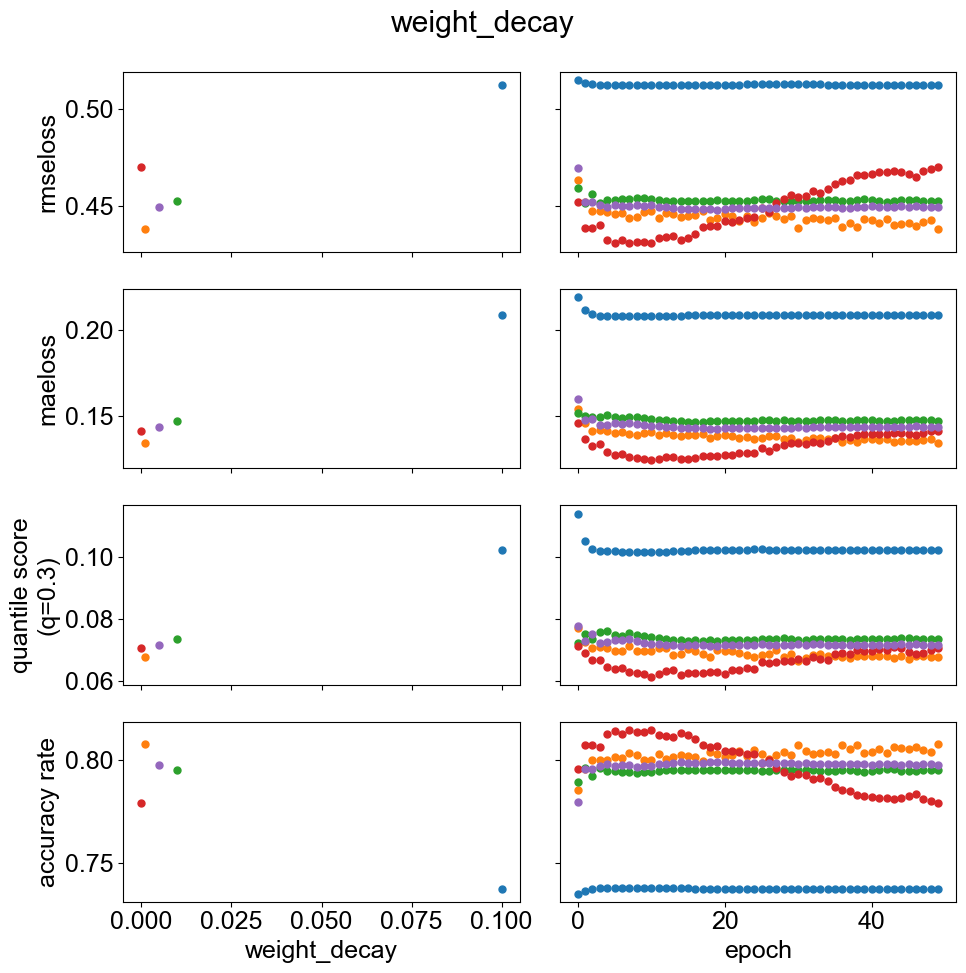

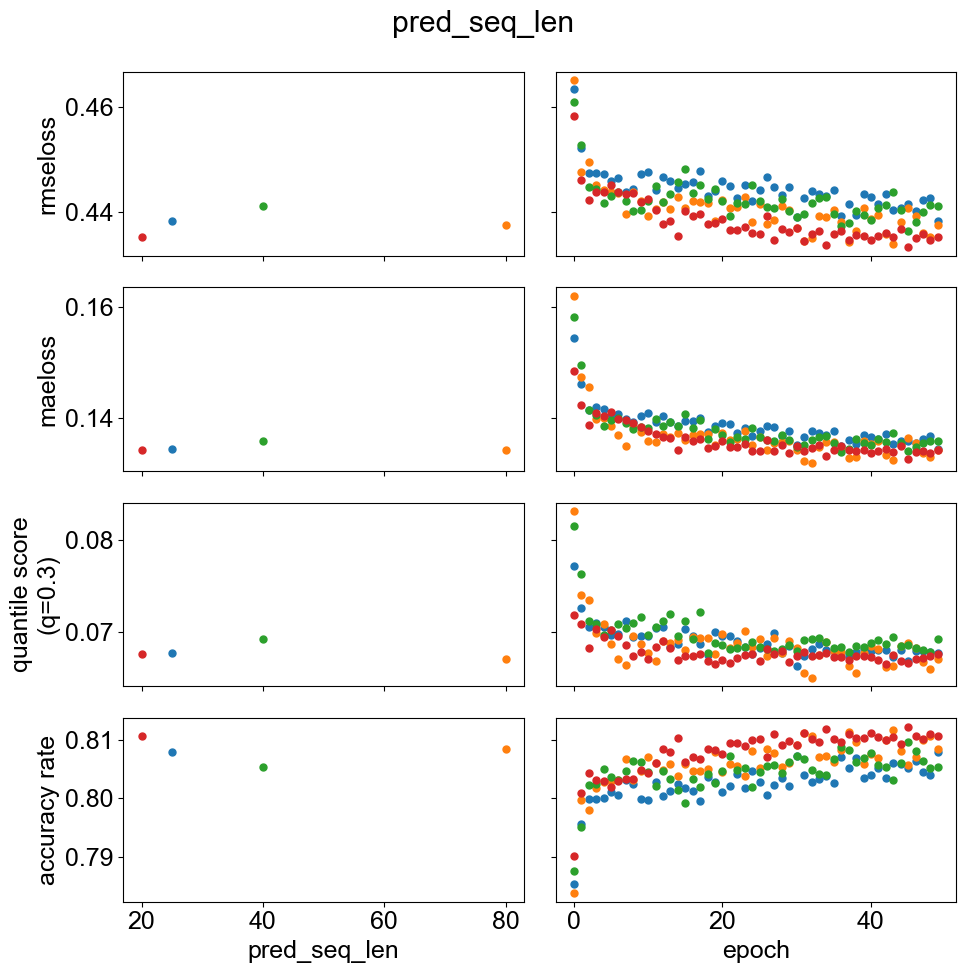

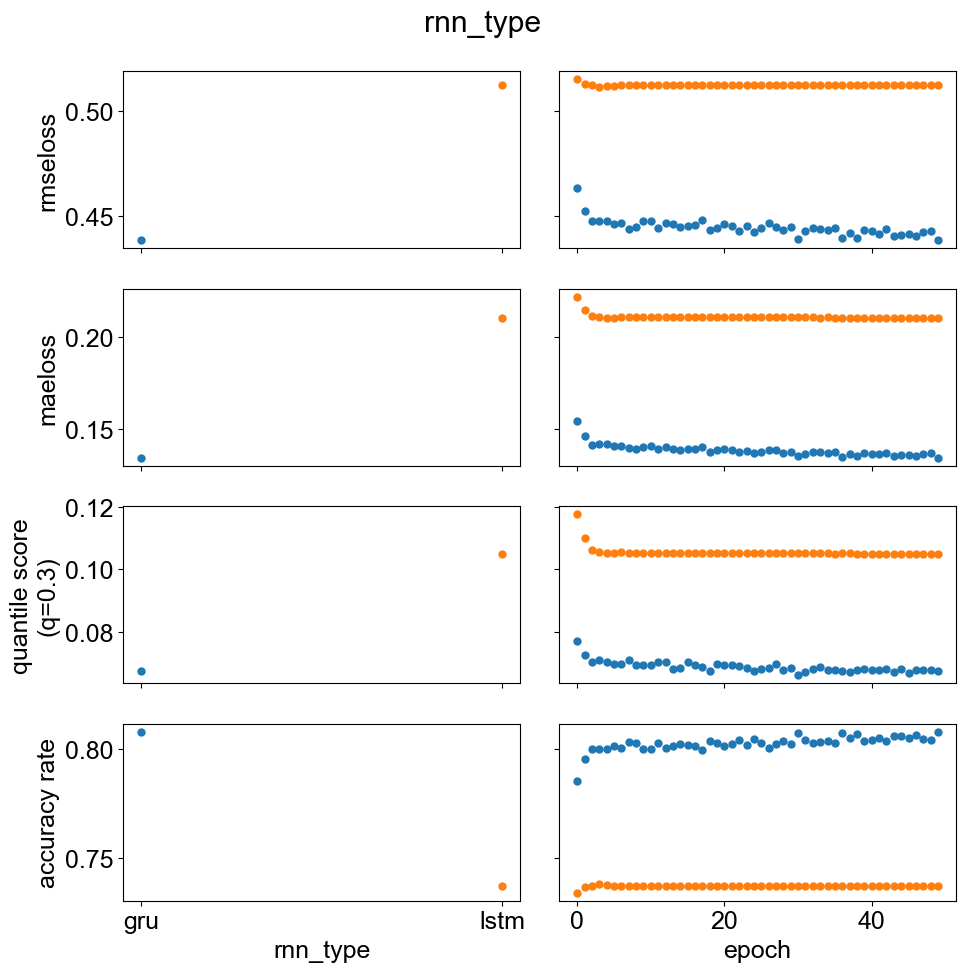

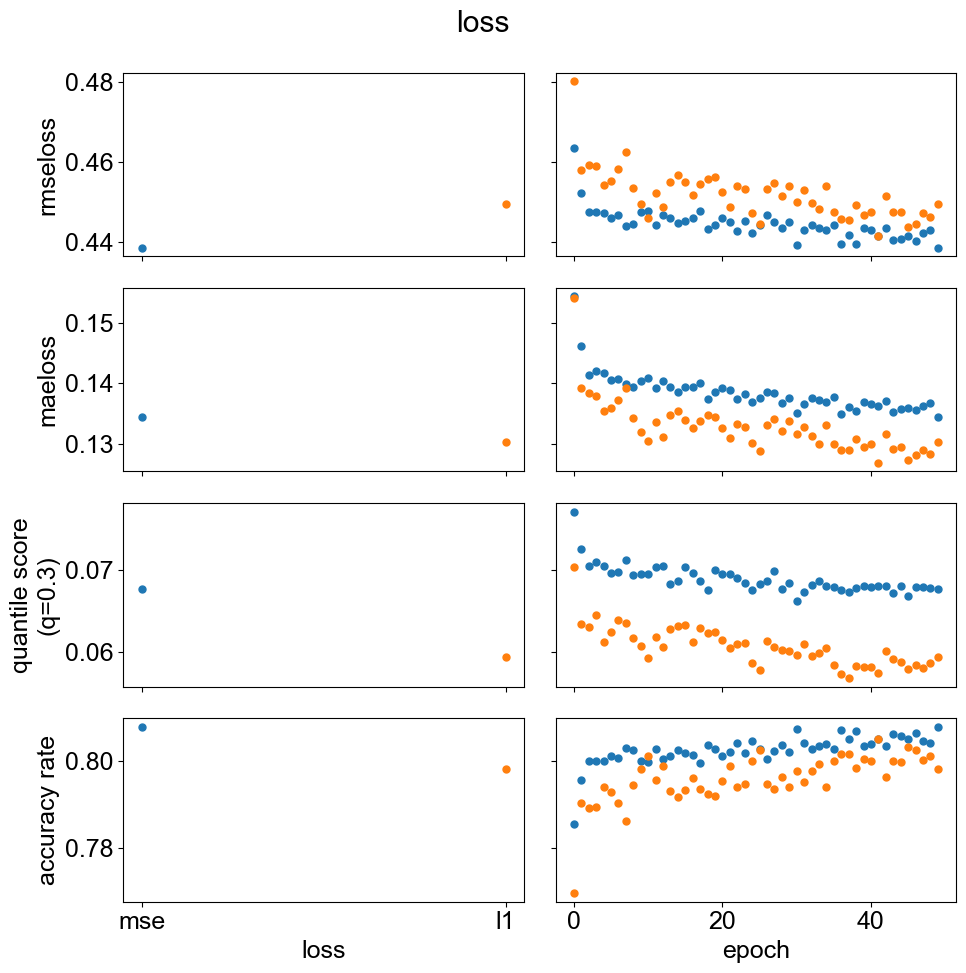

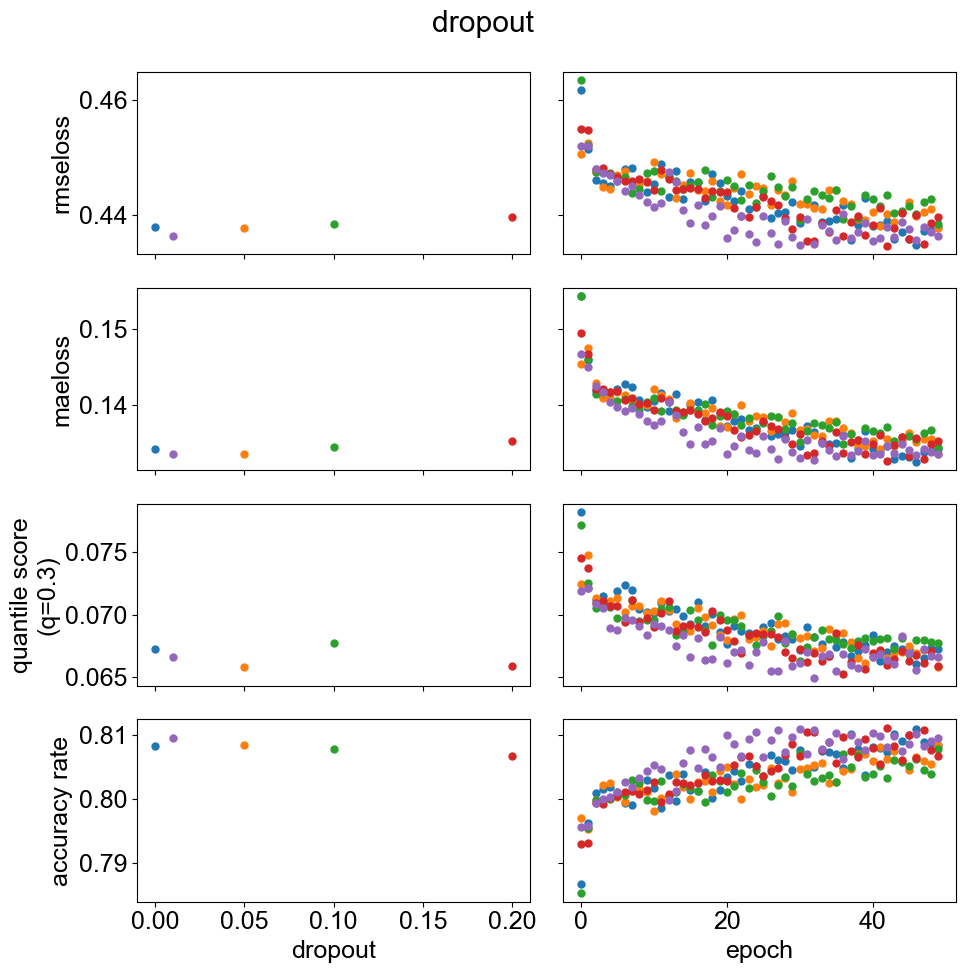

{'type': 'rnn', 'train': array([0.05473793, 0.03653595, 0.03387009, 0.03238165, 0.03147395,
       0.03086233, 0.03052123, 0.03032926, 0.03010753, 0.02991171,
       0.02979105, 0.02970687, 0.02963511, 0.02950486, 0.02940674,
       0.02934677, 0.0292975 , 0.02927553, 0.02921087, 0.02911569,
       0.02909856, 0.02908026, 0.02903115, 0.02901937, 0.02895821,
       0.02892709, 0.02888455, 0.0288481 , 0.02883321, 0.0288127 ,
       0.02880309, 0.0287827 , 0.02877384, 0.02873018, 0.02874039,
       0.02869474, 0.02867888, 0.02865565, 0.02863575, 0.02862293,
       0.02860688, 0.0285953 , 0.02857311, 0.02856341, 0.02854759,
       0.02856209, 0.02853002, 0.02849492, 0.02847893, 0.02847605]), 'rmseloss': array([0.44959135, 0.44140032, 0.43684042, 0.43378302, 0.43257351,
       0.43180547, 0.43224578, 0.43414167, 0.43411299, 0.43416841,
       0.43272056, 0.4326414 , 0.43132248, 0.43160304, 0.433088  ,
       0.43467915, 0.43482304, 0.43531293, 0.43224487, 0.43204916,
       0.43304094, 0.43

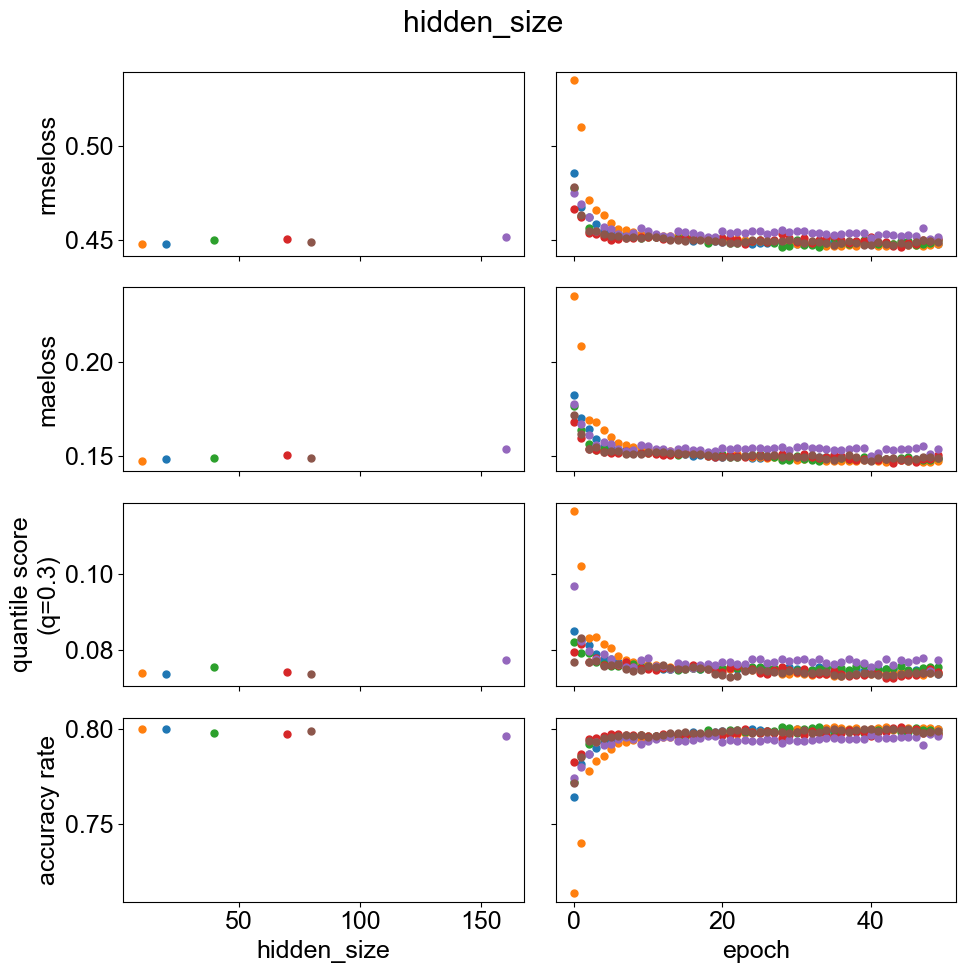

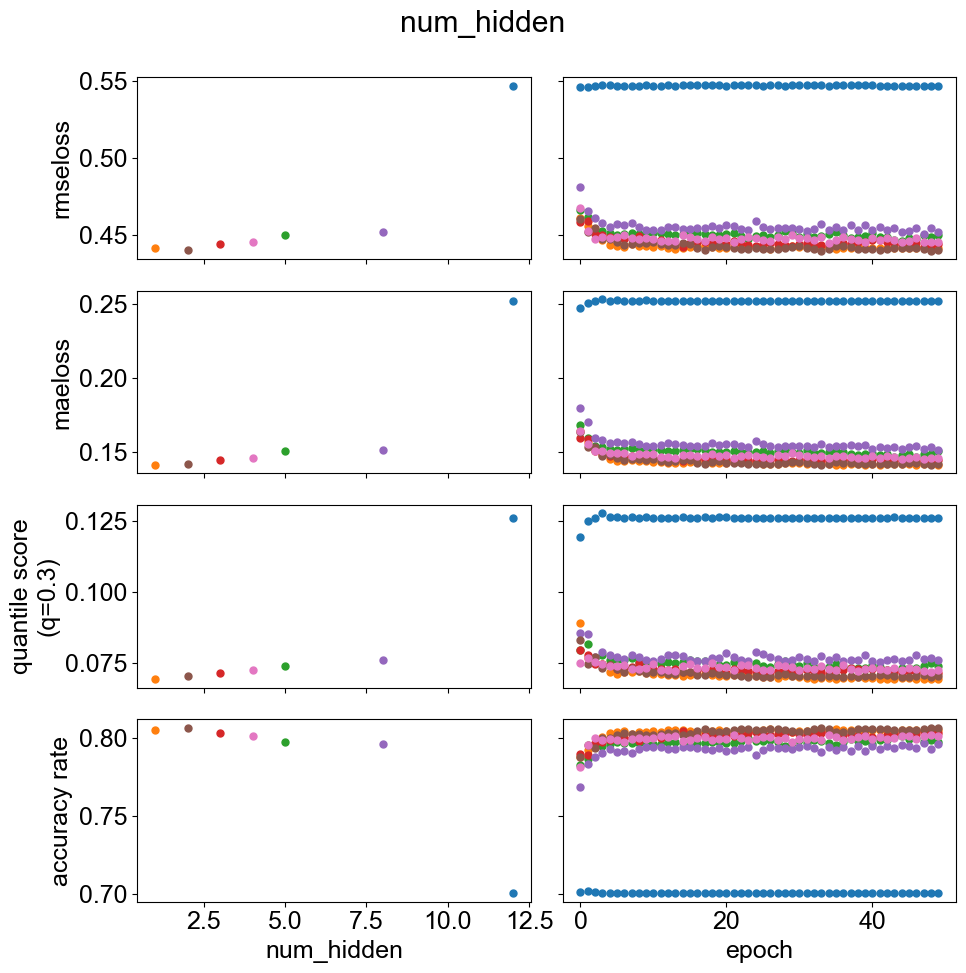

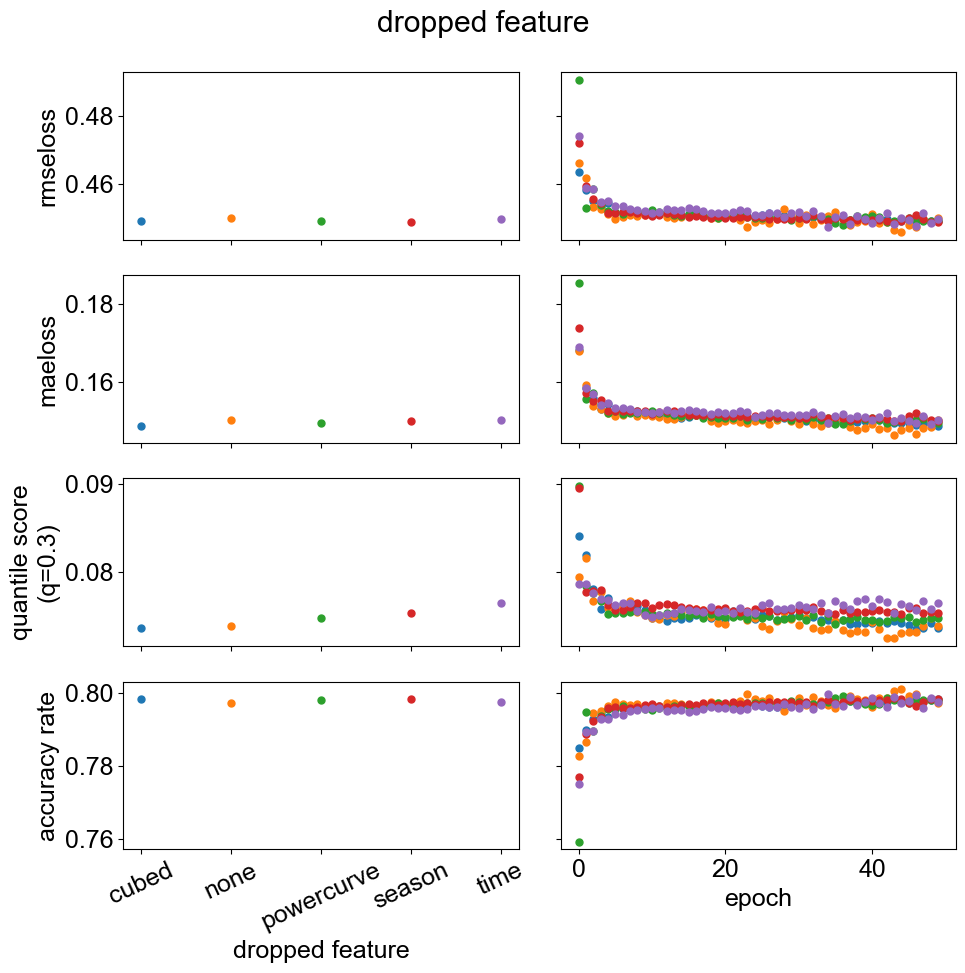

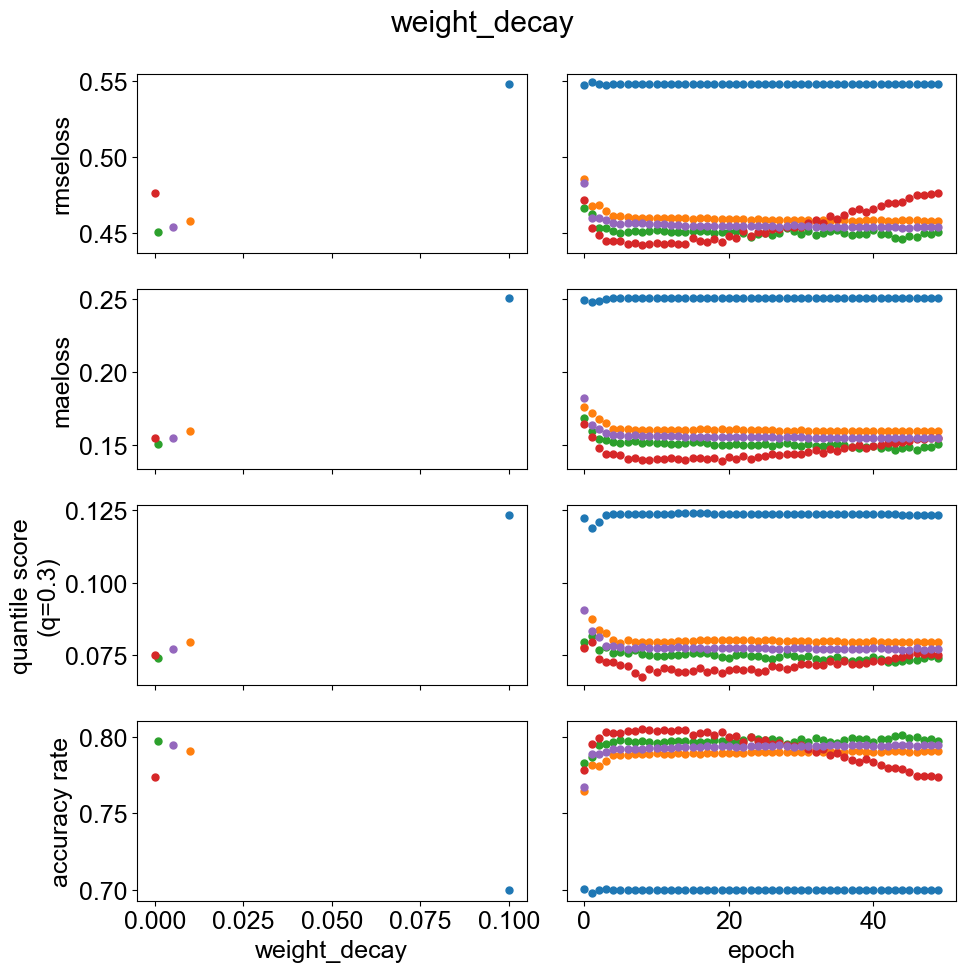

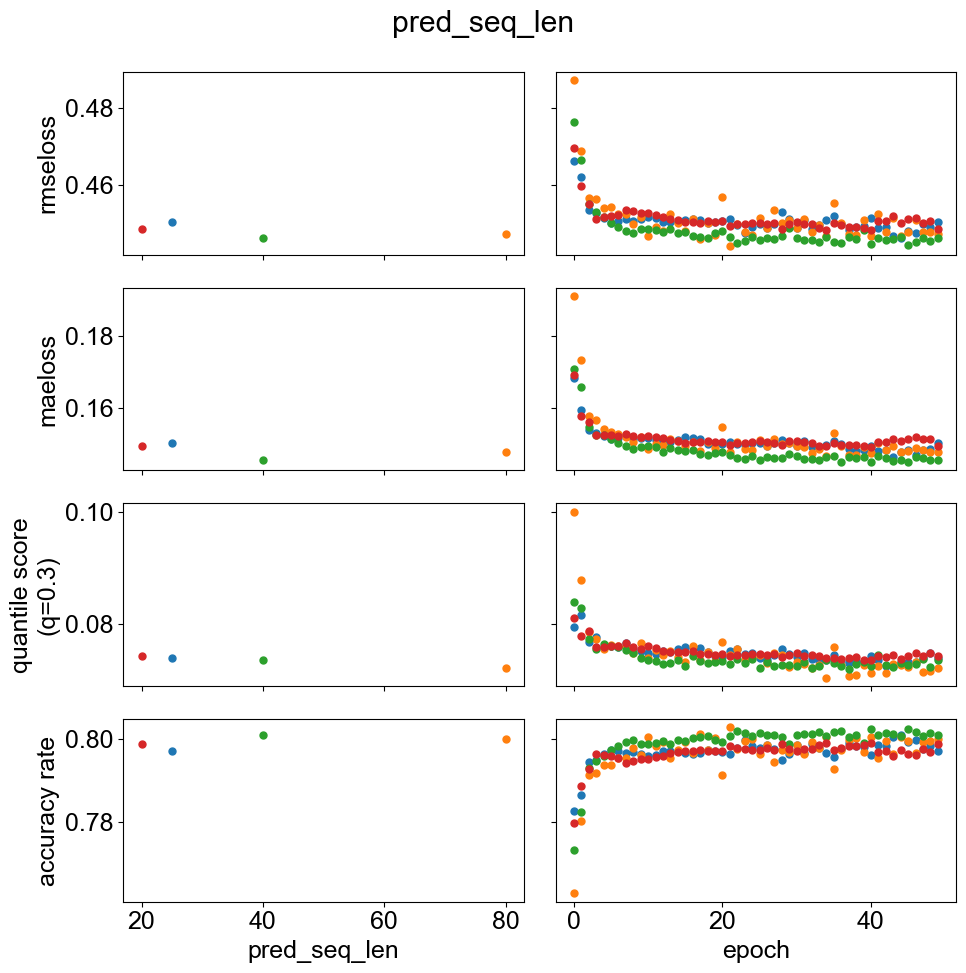

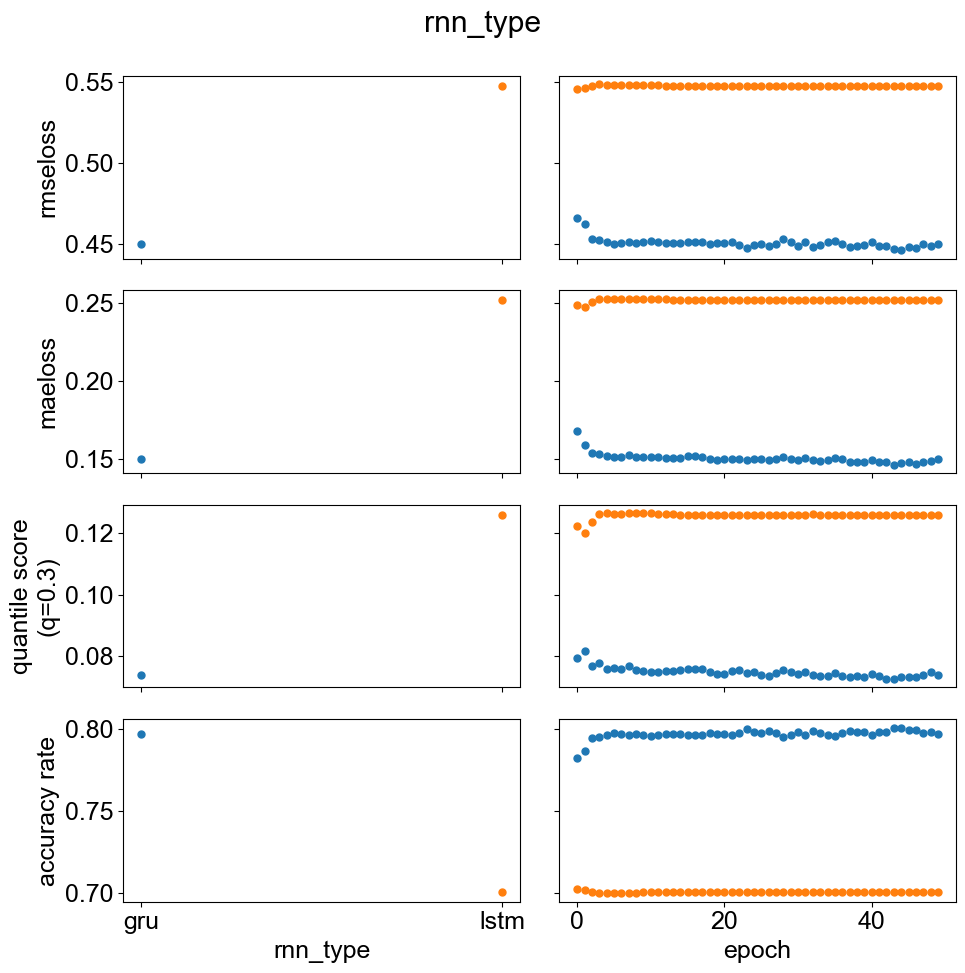

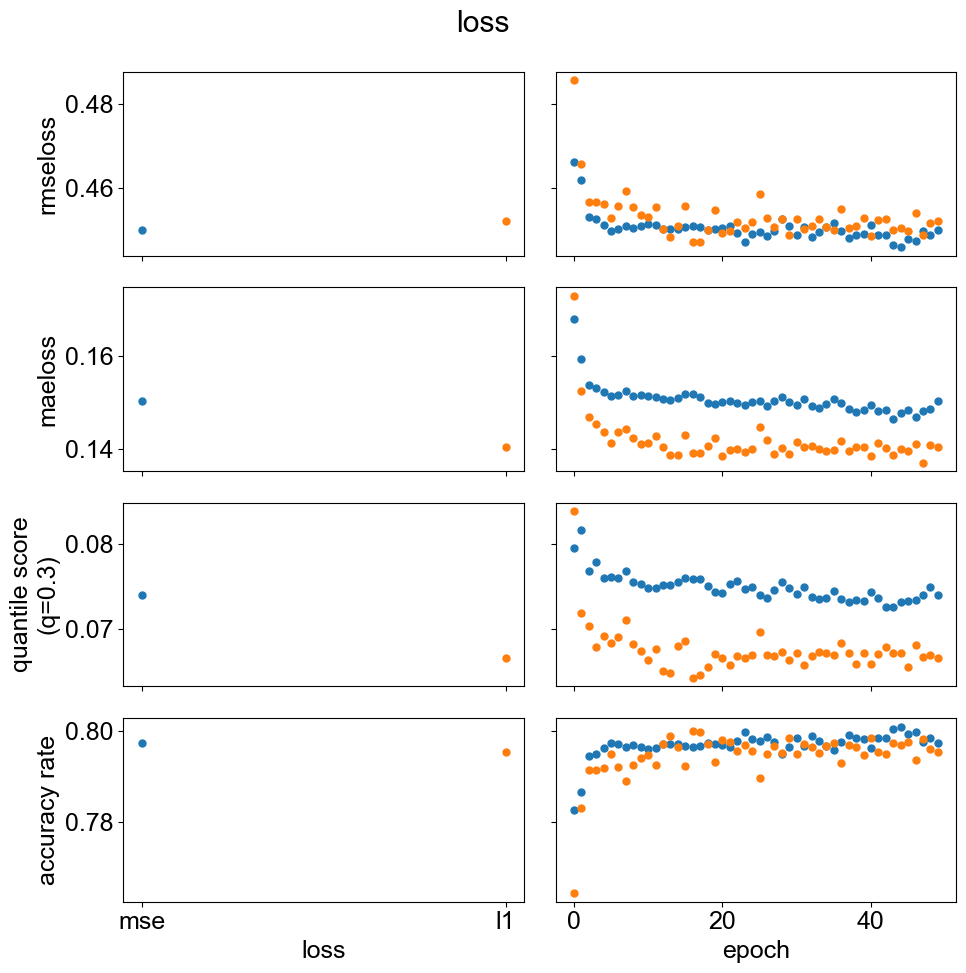

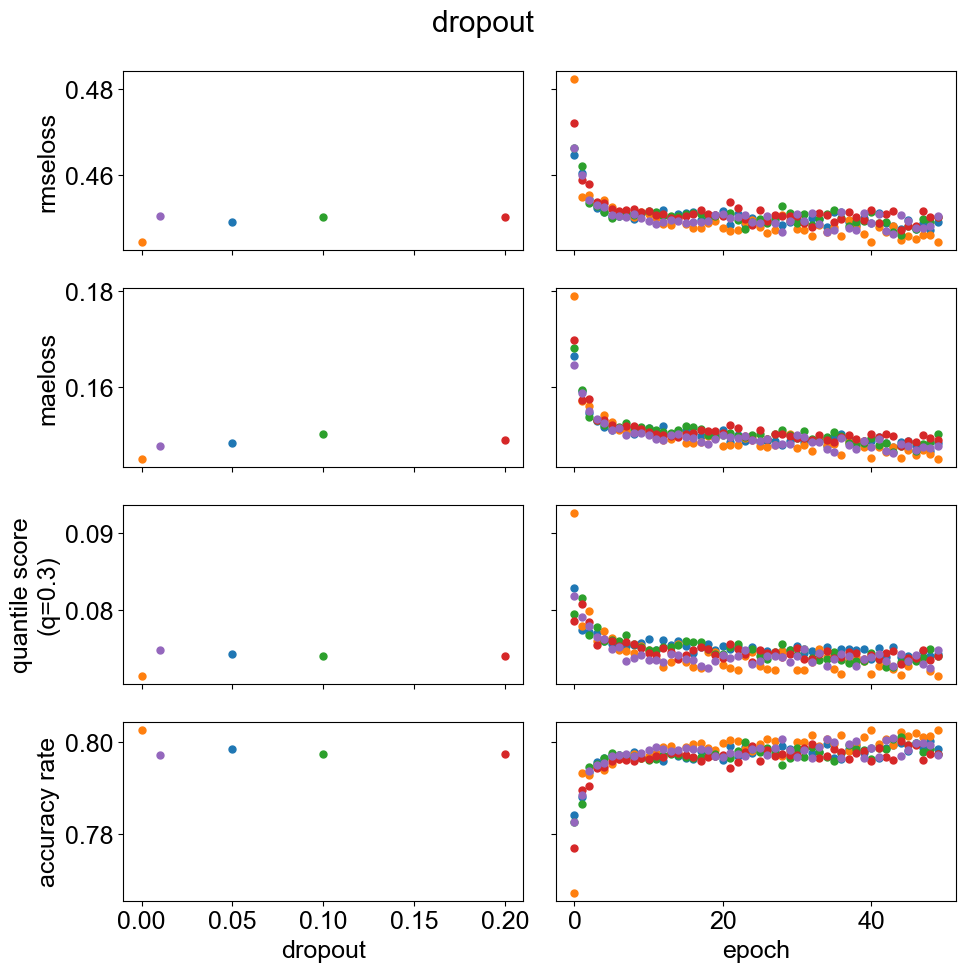

{'type': 'rnn', 'train': array([0.07100898, 0.04354915, 0.03995082, 0.03843665, 0.03757462,
       0.03696606, 0.03651084, 0.03615719, 0.03581021, 0.03562045,
       0.03542245, 0.03526175, 0.03516028, 0.03507388, 0.03497694,
       0.03487749, 0.034813  , 0.03476539, 0.03466429, 0.03463663,
       0.03460526, 0.03456476, 0.03455046, 0.03452931, 0.03447726,
       0.03448685, 0.03445215, 0.03440812, 0.03443082, 0.03439181,
       0.0343622 , 0.03433653, 0.03426654, 0.03431509, 0.03432755,
       0.03425184, 0.03422107, 0.03420948, 0.03424476, 0.03420193,
       0.03417083, 0.03410607, 0.03412893, 0.03412333, 0.03412389,
       0.03412577, 0.03410026, 0.03407782, 0.03409087, 0.03408195]), 'rmseloss': array([0.46046409, 0.45208688, 0.45451582, 0.44718218, 0.44704186,
       0.4453561 , 0.44372927, 0.44427192, 0.44460705, 0.4450001 ,
       0.44514689, 0.44430349, 0.44326943, 0.44362077, 0.44469689,
       0.4442068 , 0.44177316, 0.44034114, 0.44199709, 0.44271427,
       0.44239697, 0.44

In [9]:
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

do_plot = True

for case in [3,2,1]:
    subset = {'type':'ffnn', 'case':case}

    for par_plot in ffnn_params:
        nns_to_check = plot_parameter(par_plot, subset, do_plot)
    
    all_accs = [nn['accuracy rate'][-1] for nn in nns_to_check]
    index_max = max(range(len(all_accs)), key=all_accs.__getitem__)
    print(nns_to_check[index_max])
    
    print(f'ffnn. case: {case}, max acc: {nns_to_check[index_max]["accuracy rate"][-1]:.2f}')
    

for case in [3,2,1]:
    subset = {'type':'cnn', 'case':case}
    
    for par_plot in cnn_params:
        nns_to_check = plot_parameter(par_plot, subset, do_plot)
    
    all_accs = [nn['accuracy rate'][-1] for nn in nns_to_check]
    index_max = max(range(len(all_accs)), key=all_accs.__getitem__)
    print(nns_to_check[index_max])
    
    print(f'cnn. case: {case}, max acc: {nns_to_check[index_max]["accuracy rate"][-1]:.2f}')
    

for case in [3,2,1]:
    subset = {'type':'rnn', 'case':case}
    
    for par_plot in rnn_params:
        nns_to_check = plot_parameter(par_plot, subset, do_plot)
    
    all_accs = [nn['accuracy rate'][-1] for nn in nns_to_check]
    index_max = max(range(len(all_accs)), key=all_accs.__getitem__)
    print(nns_to_check[index_max])
    
    print(f'rnn. case: {case}, max acc: {nns_to_check[index_max]["accuracy rate"][-1]:.2f}')
